<a href="https://colab.research.google.com/github/S-Osman4/Zindi/blob/main/Wildlife_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Burn Area Prediction

This project aims to predict the burn area of wildfires based on various climate and geographical features using machine learning techniques.


The project follows these steps:

1. **Problem Definition:** Clearly define the objective of predicting wildfire burn area.
2. **Data Collection:** Describe the source and structure of the dataset.
3. **Data Preprocessing:**
    - Handle missing values.
    - Visualize data distributions and identify outliers.
4. **Feature Engineering:**
    - Address outliers using Winsorization and IQR-based filtering.
    - Create new features based on domain knowledge (e.g., combined temperature and vapor pressure, combined vegetation).
5. **Data Splitting:**
    - Split the dataset into training and validation sets (consider time-based splitting for a more realistic evaluation).
6. **Data Scaling:**
    - Scale numerical features using RobustScaler to handle potential outliers.
7. **Model Selection:**
    - Experiment with various regression models (Linear Regression, Random Forest, Gradient Boosting, etc.).
8. **Model Training:**
    - Train the selected models on the preprocessed data.
9. **Model Evaluation:**
    - Evaluate model performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.
10. **Model Improvement:**
    - Fine-tune hyperparameters and consider feature selection/engineering for further improvement.

# Step 1: Problem Definition

**Objective**: Predict the burn area of wildfires based on various climate and geographical features.

# Step 2: Data Collection

The dataset used for this project is sourced from a wildfire prediction challenge. It contains features such as:

- Climate data (temperature, precipitation, etc.)
- Landcover data
- Geographical features (latitude, longitude, elevation)


First, mount your Google Drive to access the datasets:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 3: Data Preprocessing




## Load the Data:

We'll load the dataset and inspect its structure.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from re import X
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/fire-extent-prediction-challenge-120240716-19716-ztmgh3/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/fire-extent-prediction-challenge-120240716-19716-ztmgh3/Test.csv')
variable_definitions = pd.read_csv('/content/drive/MyDrive/fire-extent-prediction-challenge-120240716-19716-ztmgh3/variable_definitions.csv')

# Display the first few rows of the train dataset
print(train_data.head())


             ID        lat        lon  burn_area  climate_aet  climate_def  \
0  0_2001-01-01 -15.858835  29.237029        0.0         1195            0   
1  1_2001-01-01 -15.858835  29.487029        0.0         1196            0   
2  2_2001-01-01 -15.858835  29.737029        0.0         1190            0   
3  3_2001-01-01 -15.858835  29.987029        0.0         1144            0   
4  4_2001-01-01 -15.858835  30.237029        0.0         1187            0   

   climate_pdsi  climate_pet  climate_pr  climate_ro  ...  landcover_0  \
0           263         1195         206          10  ...          0.0   
1           232         1196         201          10  ...          0.0   
2           314         1190         192          10  ...          0.0   
3           321         1144         186          66  ...          0.0   
4           413         1187         186           9  ...          0.0   

   landcover_1  landcover_2  landcover_3  landcover_4  landcover_5  \
0          0.0  

## Understand the Data:



### Check for null values, data types, and basic statistics.

In [80]:
# Check for missing values
print(train_data.isnull().sum())

# Data types and basic statistics
print(train_data.info())
print(train_data.describe())


ID               0
lat              0
lon              0
burn_area        0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_swe      0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def   

# Step 4: Feature Engineering

## Handle Missing Values:



In [81]:
# Check for missing values
print(train_data.isnull().sum())


ID               0
lat              0
lon              0
burn_area        0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_swe      0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64


## Visualizing Data


### Histograms

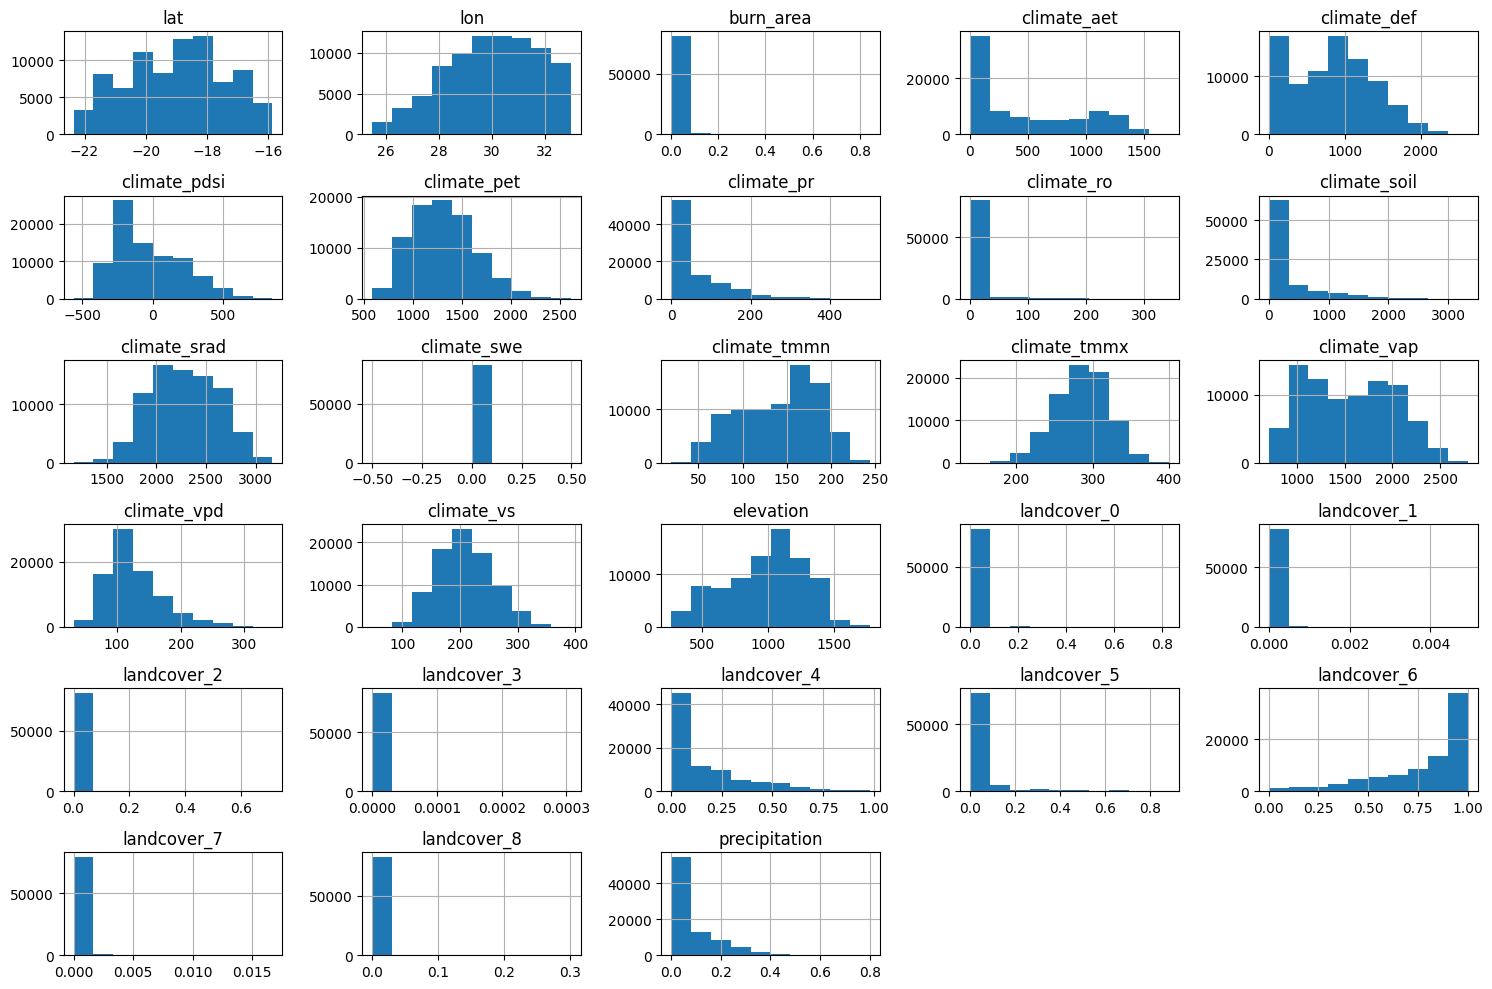

In [5]:
# Create histograms for all columns
train_data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


### Boxplots

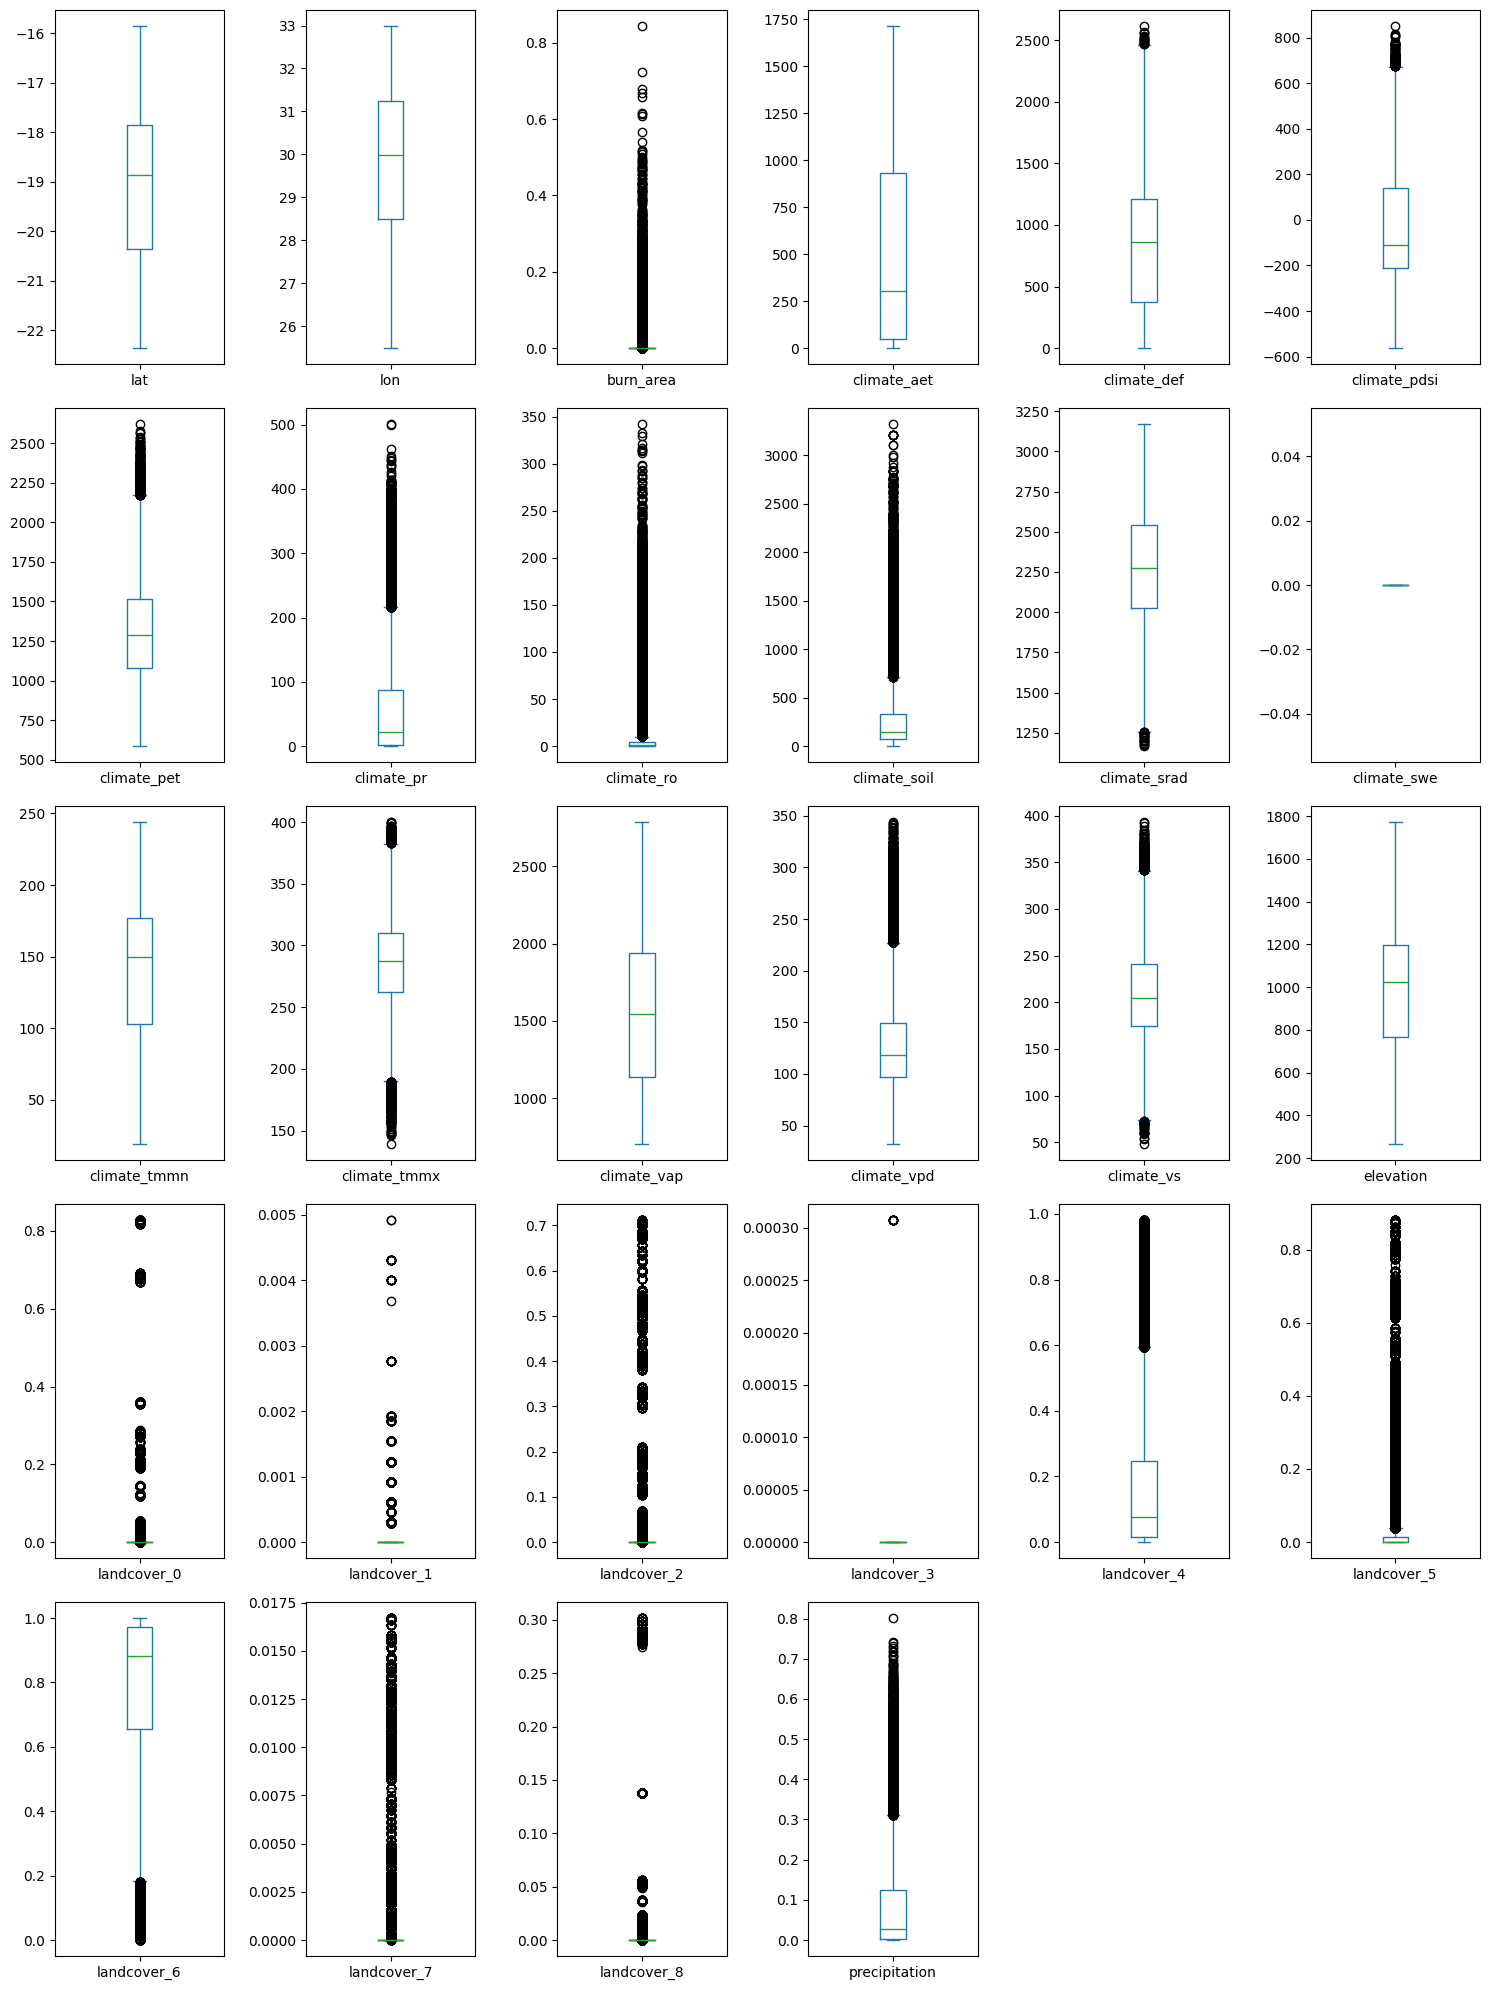

In [6]:
# Create box plots for all columns
train_data.plot(kind='box', subplots=True, layout=(5, 6), figsize=(15, 20))
plt.tight_layout()
plt.show()


## Analysing the distribution

### Descriptive statistics

In [ ]:
# Descriptive statistics
print(train_data.describe())


                lat           lon     burn_area   climate_aet   climate_def  \
count  83148.000000  83148.000000  83148.000000  83148.000000  83148.000000   
mean     -19.014557     29.860856      0.007632    484.491124    828.892721   
std        1.588444      1.751090      0.029226    470.467480    546.934469   
min      -22.358835     25.487029      0.000000      0.000000      0.000000   
25%      -20.358835     28.487029      0.000000     50.000000    375.000000   
50%      -18.858835     29.987029      0.000000    302.000000    858.000000   
75%      -17.858835     31.237029      0.000000    931.000000   1211.000000   
max      -15.858835     32.987029      0.843886   1713.000000   2614.000000   

       climate_pdsi   climate_pet    climate_pr    climate_ro  climate_soil  \
count  83148.000000  83148.000000  83148.000000  83148.000000  83148.000000   
mean     -30.806237   1313.382992     54.576322      6.215134    305.477919   
std      235.802930    315.209838     71.997561    

### Skewness

Evaluate the skewness of numerical features to detect any asymmetric distribution:

In [82]:
# Check for skewness
print(train_data.select_dtypes(include=['float64', 'int64']).skew())
# Calculate skewness for each feature
skewness = train_data.select_dtypes(include=['float64', 'int64']).skew()

# Identify right skewed features
skewed_features_right = skewness[abs(skewness) > 1].index

# Display skewed features
print("Right Skewed features:")
print(skewed_features_right)

# Identify left skewed features
skewed_features_left = skewness[abs(skewness) < 1].index

# Display skewed features
print("Left Skewed features:")
print(skewed_features_left)

lat              -0.054792
lon              -0.290142
burn_area         7.675599
climate_aet       0.583055
climate_def       0.089321
climate_pdsi      0.661010
climate_pet       0.417433
climate_pr        1.696194
climate_ro        6.600713
climate_soil      2.296452
climate_srad      0.022091
climate_swe       0.000000
climate_tmmn     -0.310836
climate_tmmx     -0.224872
climate_vap       0.147505
climate_vpd       1.129643
climate_vs        0.237334
elevation        -0.310331
landcover_0      11.912567
landcover_1      14.935920
landcover_2       8.583332
landcover_3      86.926301
landcover_4       1.519589
landcover_5       4.305090
landcover_6      -1.254550
landcover_7       6.254240
landcover_8      17.026062
precipitation     1.735759
dtype: float64
Right Skewed features:
Index(['burn_area', 'climate_pr', 'climate_ro', 'climate_soil', 'climate_vpd',
       'landcover_0', 'landcover_1', 'landcover_2', 'landcover_3',
       'landcover_4', 'landcover_5', 'landcover_6', 'landcov

### Range

Determine the range of each numerical feature to understand their variability:

In [ ]:
# Print range (min and max) for each numerical column
for column in train_data.select_dtypes(include=['float64', 'int64']):
  print(f"Range for {column}: ({train_data[column].min()}, {train_data[column].max()})")


Range for lat: (-22.358834999999885, -15.858834999999884)
Range for lon: (25.487029, 32.987029)
Range for burn_area: (0.0, 0.843885674469581)
Range for climate_aet: (0, 1713)
Range for climate_def: (0, 2614)
Range for climate_pdsi: (-563, 851)
Range for climate_pet: (587, 2620)
Range for climate_pr: (0, 501)
Range for climate_ro: (0, 342)
Range for climate_soil: (1, 3319)
Range for climate_srad: (1167, 3170)
Range for climate_swe: (0, 0)
Range for climate_tmmn: (19, 244)
Range for climate_tmmx: (139, 400)
Range for climate_vap: (704, 2786)
Range for climate_vpd: (32, 344)
Range for climate_vs: (48, 393)
Range for elevation: (265.37941764564084, 1771.9306888897788)
Range for landcover_0: (0.0, 0.8281306314722378)
Range for landcover_1: (0.0, 0.0049180268586947)
Range for landcover_2: (0.0, 0.7116032687301125)
Range for landcover_3: (0.0, 0.0003073688981246)
Range for landcover_4: (0.0, 0.9814718383031864)
Range for landcover_5: (0.0, 0.881323243305794)
Range for landcover_6: (1.92857986

## Deciding on Outlier Handling Method

###  Analyze Outliers Using IQR Method

Outliers can significantly impact model performance. Use the Interquartile Range (IQR) method to identify and analyze outliers in the data:

In [83]:
# Calculate IQR for numerical columns
Q1 = train_data.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = train_data.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((train_data.select_dtypes(include=['float64', 'int64']) < lower_bound) | (train_data.select_dtypes(include=['float64', 'int64']) > upper_bound)).sum()

print(outliers)


lat                  0
lon                  0
burn_area        19423
climate_aet          0
climate_def         17
climate_pdsi       127
climate_pet        597
climate_pr        3451
climate_ro        5511
climate_soil     10909
climate_srad        23
climate_swe          0
climate_tmmn         0
climate_tmmx       419
climate_vap          0
climate_vpd       3096
climate_vs         260
elevation            0
landcover_0       5228
landcover_1       2196
landcover_2      14034
landcover_3         11
landcover_4       3504
landcover_5      14229
landcover_6       2436
landcover_7       7618
landcover_8      10043
precipitation     3383
dtype: int64


### Outlier Summary for each feature

Categorize the outliers based on their occurrence in the dataset:

* Low Outliers (<1%): Features with less than 1% outliers.
* Moderate Outliers (1-10%)
* High Outliers (>10%): Features with more than 10% outliers.

In [84]:
# Calculate IQR for numerical columns
Q1 = train_data.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = train_data.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((train_data.select_dtypes(include=['float64', 'int64']) < lower_bound) | (train_data.select_dtypes(include=['float64', 'int64']) > upper_bound)).sum()

# Outlier Summary for each feature
outliers_df = pd.DataFrame({
    'Feature': outliers.index,
    'Number of Outliers': outliers.values,
    'Percentage of Outliers': (outliers.values / len(train_data)) * 100
})

# Categorize outliers
low_outliers = outliers_df[outliers_df['Percentage of Outliers'] < 1]
moderate_outliers = outliers_df[(outliers_df['Percentage of Outliers'] >= 1) & (outliers_df['Percentage of Outliers'] <= 10)]
high_outliers = outliers_df[outliers_df['Percentage of Outliers'] > 10]

print("Low Outliers (<1%):\n", low_outliers[['Feature','Number of Outliers', 'Percentage of Outliers']])
print("\nModerate Outliers (1-10%):\n", moderate_outliers[['Feature', 'Number of Outliers', 'Percentage of Outliers']])
print("\nHigh Outliers (>10%):\n", high_outliers[['Feature','Number of Outliers', 'Percentage of Outliers']])



Low Outliers (<1%):
          Feature  Number of Outliers  Percentage of Outliers
0            lat                   0                0.000000
1            lon                   0                0.000000
3    climate_aet                   0                0.000000
4    climate_def                  17                0.020445
5   climate_pdsi                 127                0.152740
6    climate_pet                 597                0.717997
10  climate_srad                  23                0.027662
11   climate_swe                   0                0.000000
12  climate_tmmn                   0                0.000000
13  climate_tmmx                 419                0.503921
14   climate_vap                   0                0.000000
16    climate_vs                 260                0.312695
17     elevation                   0                0.000000
21   landcover_3                  11                0.013229

Moderate Outliers (1-10%):
           Feature  Number of Outlie

### Determining which features to use

#### Understanding the features

The `variable_definitions` dataframe provides detailed descriptions of each feature in the dataset. It’s crucial to review this to understand what each feature represents and how it might influence the target variable.

In [7]:
variable_definitions

Variable                                        Description
0              ID  The IDs take the form of [area ID]_yyyy-mm-dd....
1            area                                            Area ID
2            date          The date that the data is aggregated over
3             lat                 Latitude of the center of the area
4             lon                Longitude of the center of the area
5       burn_area                       Percentage of the area burnt
6     climate_aet  Actual evapotranspiration, derived using a one...
7     climate_def  Climate water deficit, derived using a one-dim...
8    climate_pdsi                      Palmer Drought Severity Index
9     climate_pet  Reference evapotranspiration (ASCE Penman-Mont...
10     climate_pr                         Precipitation accumulation
11     climate_ro  Runoff, derived using a one-dimensional soil w...
12   climate_soil  Soil moisture, derived using a one-dimensional...
13   climate_srad               Downward surface shortwave radiation
14    climate_swe  Snow water equivalent, derived using a one-dim...
15   climate_tmmn                                Minimum temperature
16   climate_tmmx                                Maximum temperature
17    climate_vap                                     Vapor pressure
18    climate_vpd                             Vapor pressure deficit
19     climate_vs                                  Wind-speed at 10m
20      elevation                                     Land elevation
21    landcover_0  Water Bodies: at least 60% of area is covered ...
22    landcover_1  Evergreen Needleleaf Vegetation: dominated by ...
23    landcover_2  Evergreen Broadleaf Vegetation: dominated by e...
24    landcover_3  Deciduous Needleleaf Vegetation: dominated by ...
25    landcover_4  Deciduous Broadleaf Vegetation: dominated by d...
26    landcover_5  Annual Broadleaf Vegetation: dominated by herb...
27    landcover_6  Annual Grass Vegetation: dominated by herbaceo...
28    landcover_7  Non-Vegetated Lands: at least 60% of area is n...
29    landcover_8  Urban and Built-up Lands: at least 30% impervi...
30  precipitation         Merged microwave/IR precipitation estimate

## Analysing the Target Variable



### Correlation




#### Burn area data distribution vs the rest of the variables

burn_area        1.000000
climate_def      0.279511
climate_vs       0.261562
climate_vpd      0.219974
climate_pet      0.168871
climate_srad     0.160517
landcover_5      0.151957
lat              0.140848
elevation        0.074576
climate_tmmx     0.040500
landcover_4      0.013846
landcover_3      0.000964
landcover_8     -0.005215
landcover_1     -0.007266
landcover_0     -0.008137
landcover_2     -0.008348
climate_pdsi    -0.014831
lon             -0.021698
landcover_7     -0.027734
climate_ro      -0.071414
landcover_6     -0.075815
climate_soil    -0.089246
climate_tmmn    -0.099436
precipitation   -0.169218
climate_pr      -0.170532
climate_aet     -0.211806
climate_vap     -0.221348
climate_swe           NaN
Name: burn_area, dtype: float64


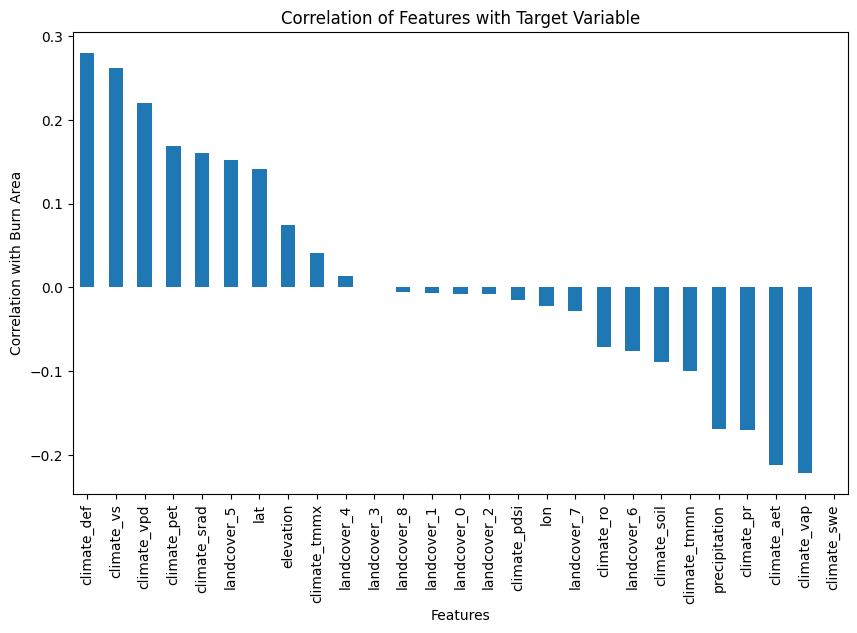

In [ ]:
# Calculate correlations
correlations = train_data.select_dtypes(include=['number']).corr()['burn_area'].sort_values(ascending=False)

# Print correlations
print(correlations)

# Visualize correlations
plt.figure(figsize=(10, 6))
correlations.drop('burn_area').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Burn Area')
plt.title('Correlation of Features with Target Variable')
plt.show()



Variables like` climate_def`, `climate_vs`, `climate_vpd`, `climate_pet`, `climate_srad`, `landcover_5`, `lat`, `elevation`, and `climate_tmmx` have a positive correlation with burn area. This means that as these variables increase, the burn area tends to increase as well.

Variables like `landcover_8`, `landcover_1`, `landcover_0`, `landcover_2`, `climate_pdsi`, `lon`, `landcover_7`, `climate_ro`, `landcover_6`, `climate_soil`, `climate_tmmn`, `precipitation`, `climate_pr`, `climate_aet`, and `climate_vap `have a negative correlation with burn area. This means that as these variables increase, the burn area tends to decrease.




#### Positively Correlated Features

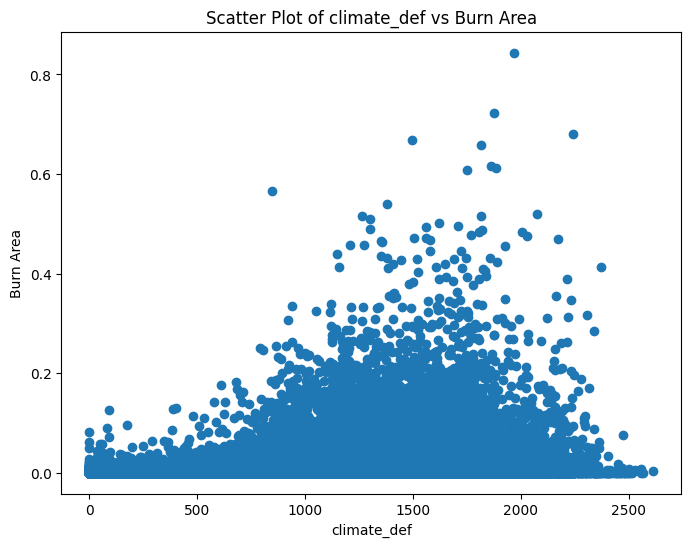

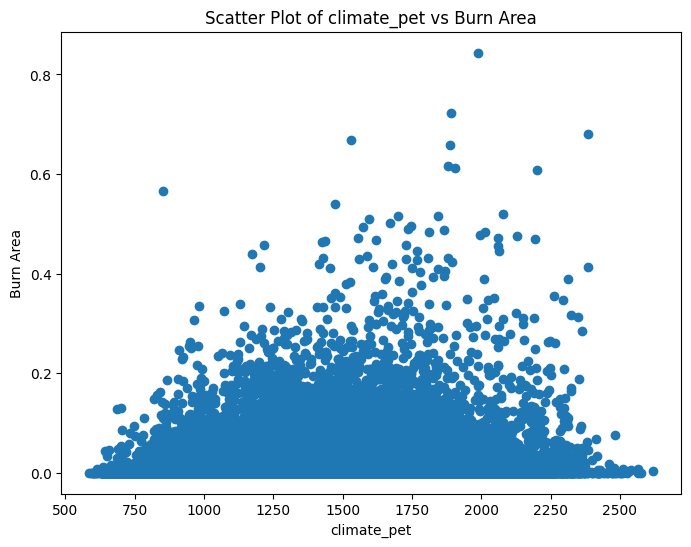

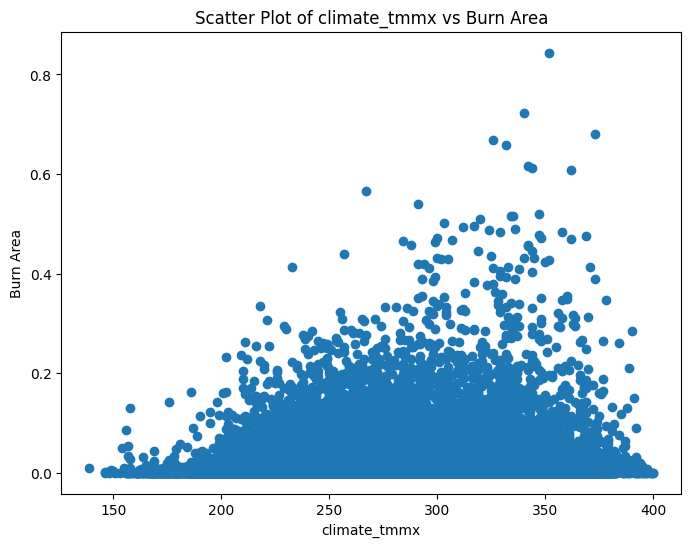

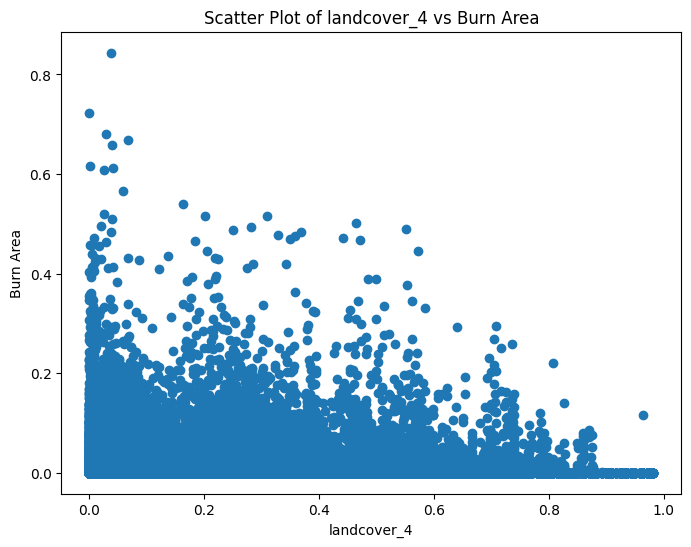

In [ ]:
# Select features with positive correlation
positive_corr_features = correlations[correlations > 0].index.drop('burn_area')

# Plot scatter plots for features with positive correlation
for feature in positive_corr_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(train_data[feature], train_data['burn_area'])
  plt.xlabel(feature)
  plt.ylabel('Burn Area')
  plt.title(f'Scatter Plot of {feature} vs Burn Area')
  plt.show()


#### Negatively Correlated Features

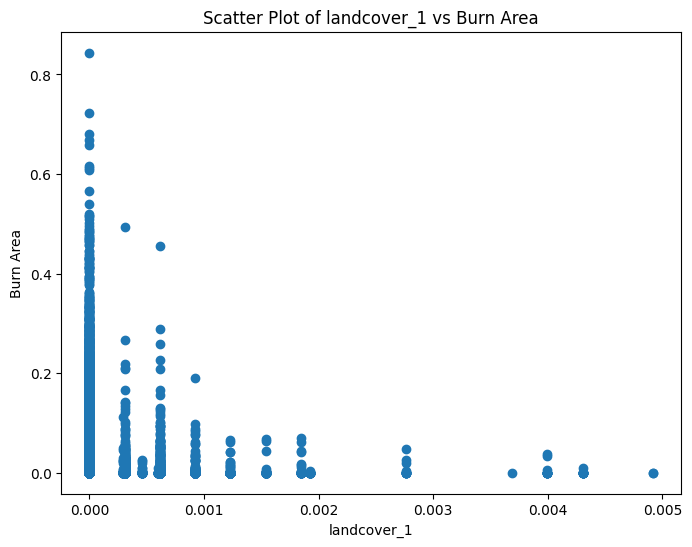

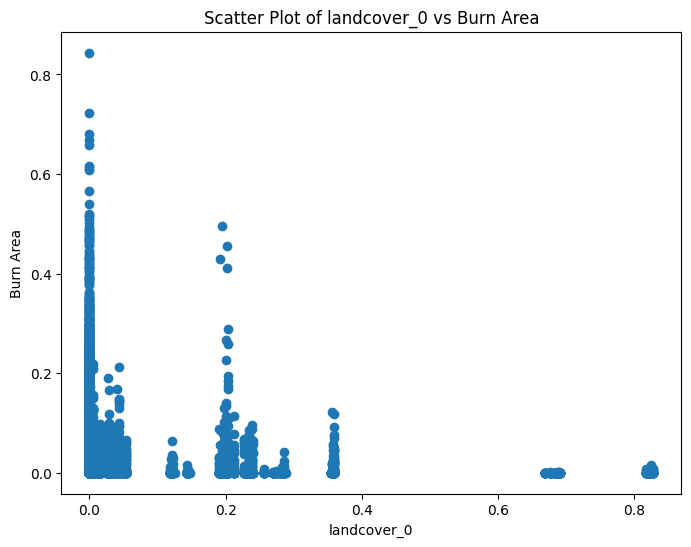

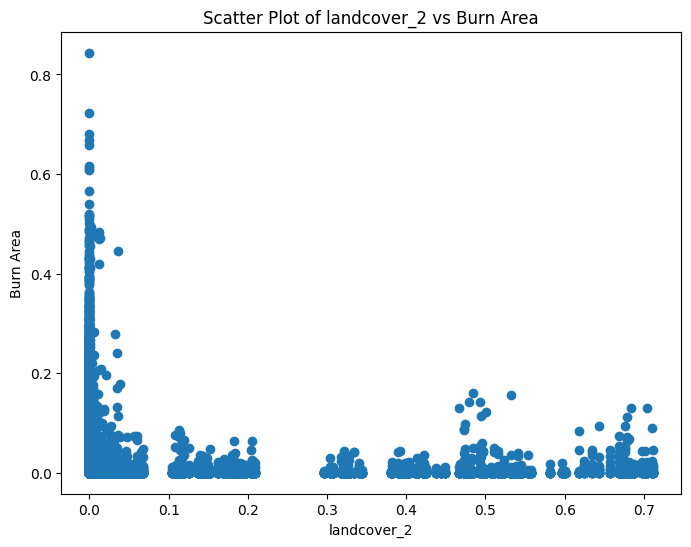

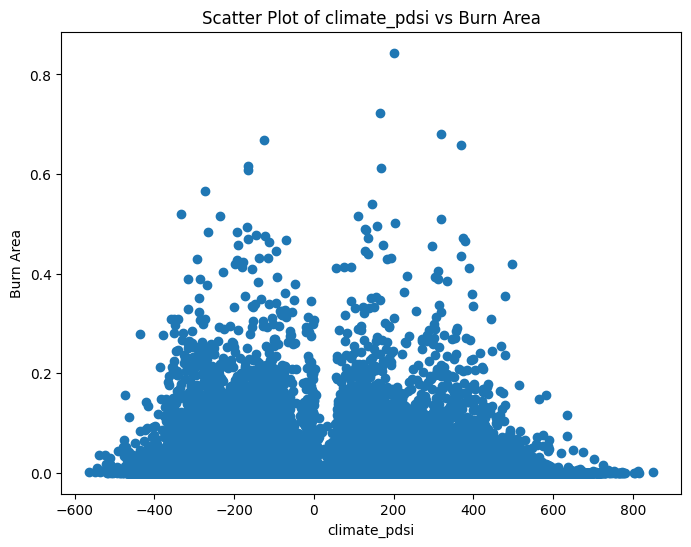

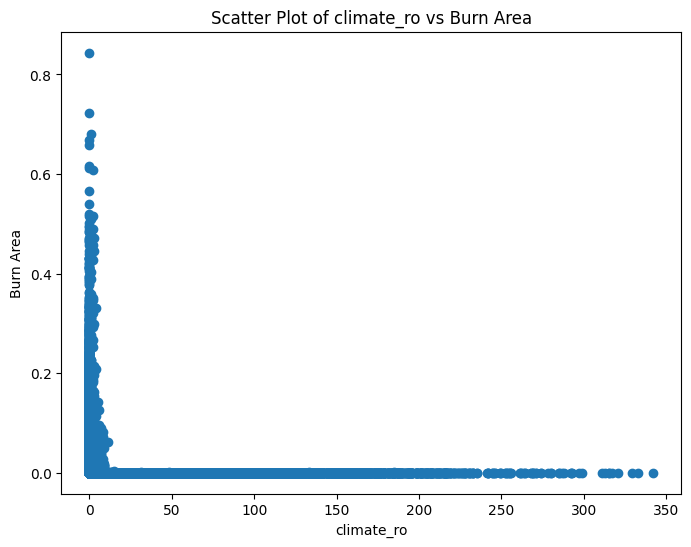

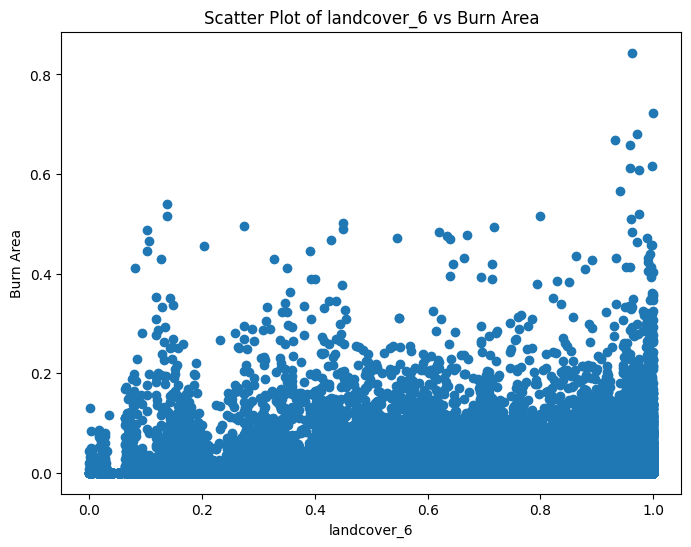

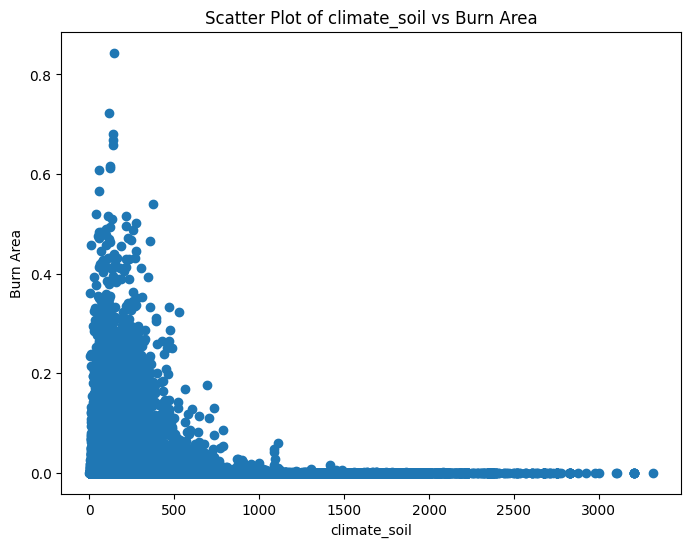

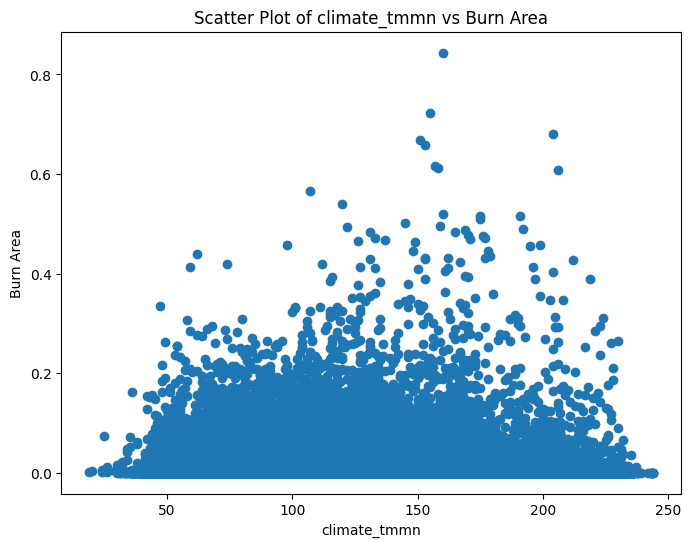

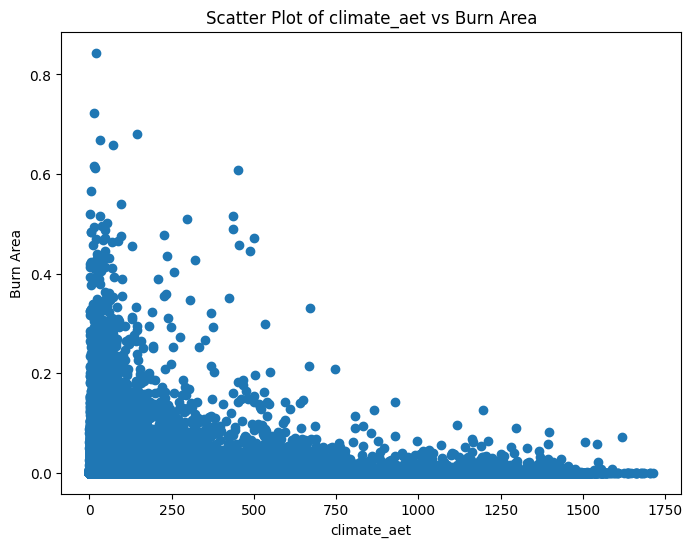

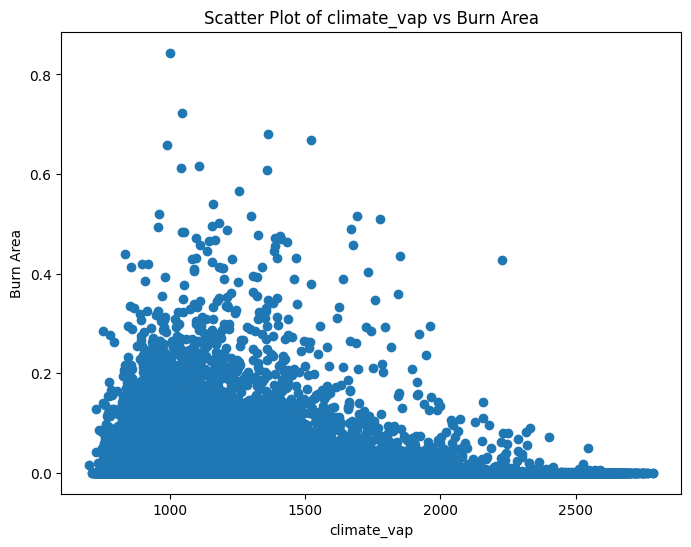

In [ ]:
# Select features with negative correlation
negative_corr_features = correlations[correlations < 0].index

# Plot scatter plots for features with negative correlation
for feature in negative_corr_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(train_data[feature], train_data['burn_area'])
  plt.xlabel(feature)
  plt.ylabel('Burn Area')
  plt.title(f'Scatter Plot of {feature} vs Burn Area')
  plt.show()


*Despite the relationships identified, most of the correlations are relatively weak, suggesting that no single variable has a dominant effect on burn area.*

#### Correlation Heatmap

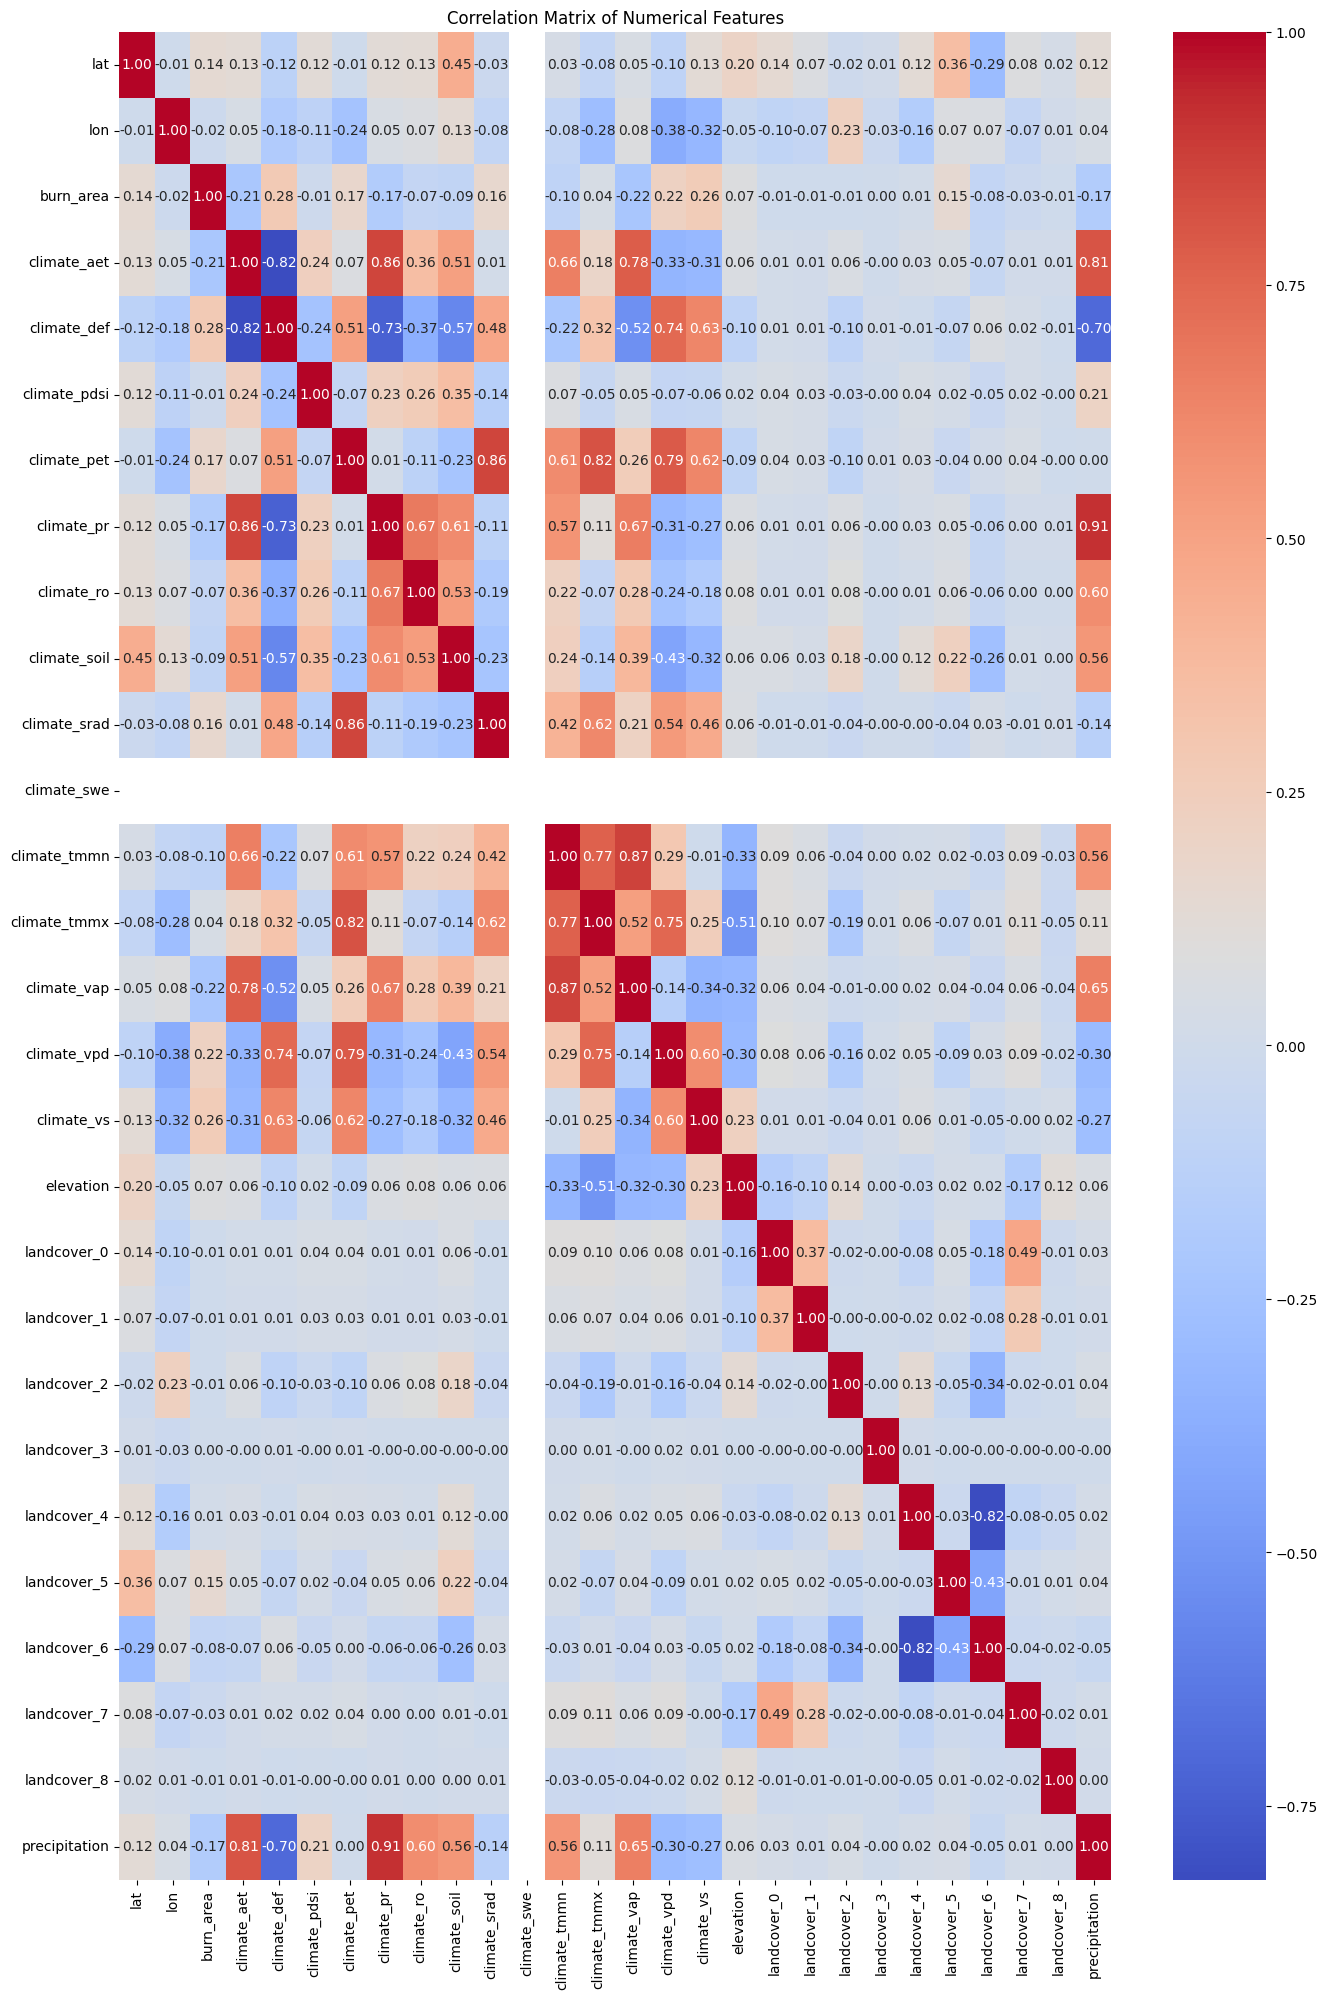

In [89]:
# Select numerical columns
numerical_data = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plot correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(16, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Correlated Pairs

In [ ]:
# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Set threshold for high correlation
threshold = 0.75

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > threshold:
      pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
      high_corr_pairs.append(pair)

# Remove duplicate pairs (order doesn't matter)
unique_high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)

# Print highly correlated pairs
print("Highly Correlated Pairs (above threshold of", threshold, "):")
for pair in unique_high_corr_pairs:
  print(pair)


Highly Correlated Pairs (above threshold of 0.75 ):
('climate_pet', 'climate_tmmx')
('climate_pet', 'climate_srad')
('climate_aet', 'climate_def')
('climate_pr', 'precipitation')
('climate_aet', 'climate_vap')
('climate_tmmn', 'climate_vap')
('landcover_4', 'landcover_6')
('climate_aet', 'precipitation')
('climate_pet', 'climate_vpd')
('climate_tmmn', 'climate_tmmx')
('climate_tmmx', 'climate_vpd')
('climate_aet', 'climate_pr')


#### Approach on how to handle Multicollinearity

The presence of highly correlated pairs of variables, is a clear indication of multicollinearity in the dataset.

**Approach**

combining to make new features.

Highly Correlated Pairs:

1. `climate_tmmn` (minimum temperature) and `climate_vap` (vapor pressure): These two are closely related as vapor pressure is influenced by temperature.
  * Combine: Create a new feature called `combined_temp_vap` by finding the average of climate_tmmn and climate_vap.

  * Reasoning: Temperature and vapor pressure are intrinsically linked, as warmer air can hold more moisture. Combining them into a single index can capture the overall effect of temperature and humidity on fire risk.

2. `landcover_4` (Deciduous Broadleaf Vegetation) and `landcover_6` (Annual Grass Vegetation): These represent similar vegetation types, indicating potential overlap in land cover classification.
  * Combine: Create a new feature called `combined_vegetation` by summing landcover_4 and landcover_6.

  * Reasoning: These landcover types represent similar vegetation with potentially different flammability. Summing them will give an aggregated representation of these related vegetation types

3.  `climate_aet` (actual evapotranspiration), `climate_pr` (precipitation), and `precipitation` (merged microwave/IR precipitation estimate): These variables are directly linked to the water cycle, with precipitation influencing evapotranspiration.
    * Combine: Create a new feature called `combined_water_cycle` by finding the average of climate_aet, climate_pr and precipitation.

    * Reasoning: These variables are all closely related to the water cycle and provide similar information about moisture availability.This average would provide a comprehensive view of the water availability and usage in the area.


4.  `climate_aet` and `climate_def` (climate water deficit): These are directly related to each other, as water deficit is the difference between potential and actual evapotranspiration.

  * Keep Both: While highly correlated, climate_def and climate_aet provide slightly different perspectives on water availability.
  
  * Reasoning: climate_def represents the difference between potential and actual evapotranspiration, indicating the degree of water stress. climate_aet represents the actual amount of water lost through evapotranspiration, which can also be relevant to fire risk.


5. `elevation` and `climate_srad` (downward surface shortwave radiation): Higher elevations typically receive more intense solar radiation.

  * Combine: Create a new feature called `elevation_sun_interaction` by multiplying elevation and climate_srad.
  * Reasoning: This captures the combined effect of elevation and solar radiation, which can influence vegetation drying and fire risk.

  (Think about how you feel when you're high up in the mountains on a sunny day. The sun often feels much more intense. This is because:

  Thinner Atmosphere: At higher elevations, there's less atmosphere to absorb and scatter the sun's rays. This means more direct solar radiation reaches the ground.
  Increased Exposure: Mountainous areas often have more exposed slopes and less shade, further increasing the amount of solar radiation hitting the surface.
    
  )

6. `climate_vpd` (vapor pressure deficit), `climate_srad`, and `climate_soil` (soil moisture): These factors contribute to the drying of vegetation and soil.

* Combine: Create a new feature called `drying_effect` by calculating (climate_vpd * climate_srad) / climate_soil.
* Reasoning: This combines the drying effects of vapor pressure deficit and solar radiation, moderated by the moisture content of the soil.

(Soil Moisture as a Buffer: Think of soil moisture as a buffer against drying.

High Soil Moisture: When the soil is wet, it can release moisture into the air, partially counteracting the drying effects of VPD and solar radiation. Dividing by a larger climate_soil value would reduce the overall drying effect.
Low Soil Moisture: When the soil is dry, it can't contribute moisture to the atmosphere. Dividing by a small climate_soil value would amplify the drying effect of VPD and solar radiation. Analogy: Imagine a wet sponge under a hot lamp. The lamp (solar radiation) and dry air (VPD) want to dry the sponge. But the wetter the sponge is initially (higher climate_soil), the longer it will take to dry and the less pronounced the overall drying effect will be.)


7. `climate_tmmx` (maximum temperature) and `climate_tmmn` (minimum temperature):- These two represent the daily temperature range.

* Combine: Create a new feature called `temp_range` by subtracting `climate_tmmn` from `climate_tmmx`.
* Reasoning: The difference between the maximum and minimum temperatures provides insight into the daily temperature fluctuations, which could influence fire behavior. Larger temperature ranges might indicate greater potential for fire spread.

#### Creating New Features

In [91]:
# Create a copy of the DataFrame to avoid modifying the original
train_data_copy = train_data.copy()

In [92]:
# 1. Combined Temperature and Vapor Pressure
train_data_copy['combined_temp_vap'] = (train_data_copy['climate_tmmn'] + train_data_copy['climate_vap']) / 2


# 2. Combined Vegetation
train_data_copy['combined_vegetation'] = (train_data_copy['landcover_4'] + train_data_copy['landcover_6'])

# 3. Combined Water Cycle
train_data_copy['combined_water_cycle'] = (train_data_copy['climate_aet'] + train_data_copy['climate_pr'] + train_data_copy['precipitation']) / 3


# 4. Elevation-Sun Interaction
train_data_copy['elevation_sun_interaction'] = train_data_copy['elevation'] * train_data_copy['climate_srad']

# 5. VPD-Solar-Soil Interaction
train_data_copy['drying_effect'] = (train_data_copy['climate_vpd'] * train_data_copy['climate_srad']) / train_data_copy['climate_soil']

# 6. Temp-range
train_data_copy['temp_range'] = train_data_copy['climate_tmmx'] - train_data_copy['climate_tmmn']



# Display the first few rows of the modified DataFrame

print(train_data_copy.head())


             ID        lat        lon  burn_area  climate_aet  climate_def  \
0  0_2001-01-01 -15.858835  29.237029        0.0         1195            0   
1  1_2001-01-01 -15.858835  29.487029        0.0         1196            0   
2  2_2001-01-01 -15.858835  29.737029        0.0         1190            0   
3  3_2001-01-01 -15.858835  29.987029        0.0         1144            0   
4  4_2001-01-01 -15.858835  30.237029        0.0         1187            0   

   climate_pdsi  climate_pet  climate_pr  climate_ro  ...  landcover_6  \
0           263         1195         206          10  ...     0.244890   
1           232         1196         201          10  ...     0.345121   
2           314         1190         192          10  ...     0.483579   
3           321         1144         186          66  ...     0.537098   
4           413         1187         186           9  ...     0.654866   

   landcover_7  landcover_8  precipitation  combined_temp_vap  \
0     0.009836       

#### Checking correlation

In [93]:
# Calculate correlations of new features with 'burn_area'
new_feature_correlations = train_data_copy[['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle',
                                          'elevation_sun_interaction', 'drying_effect','temp_range' ,
                                          'burn_area']].corr()['burn_area'].sort_values(ascending=False)
print(new_feature_correlations)

burn_area                    1.000000
temp_range                   0.203742
elevation_sun_interaction    0.138588
drying_effect               -0.032199
combined_vegetation         -0.113322
combined_water_cycle        -0.209704
combined_temp_vap           -0.212751
Name: burn_area, dtype: float64


#### Visuals of new features

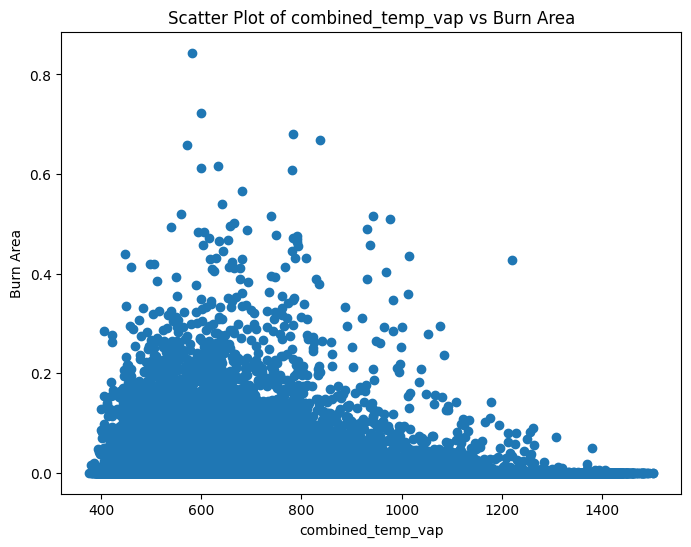

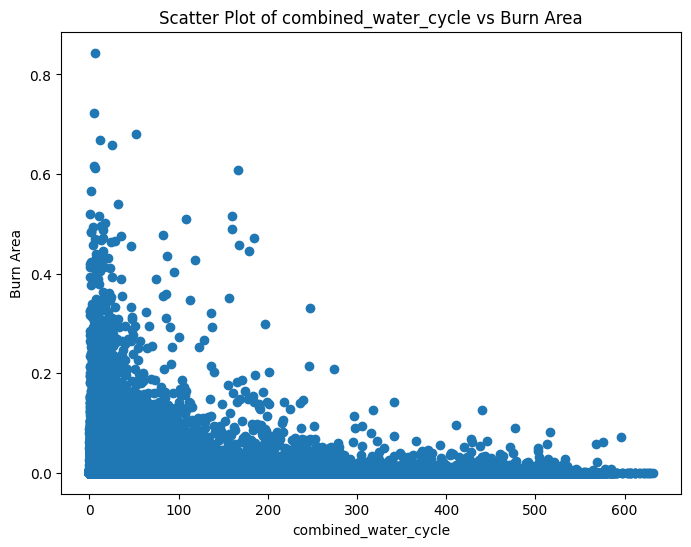

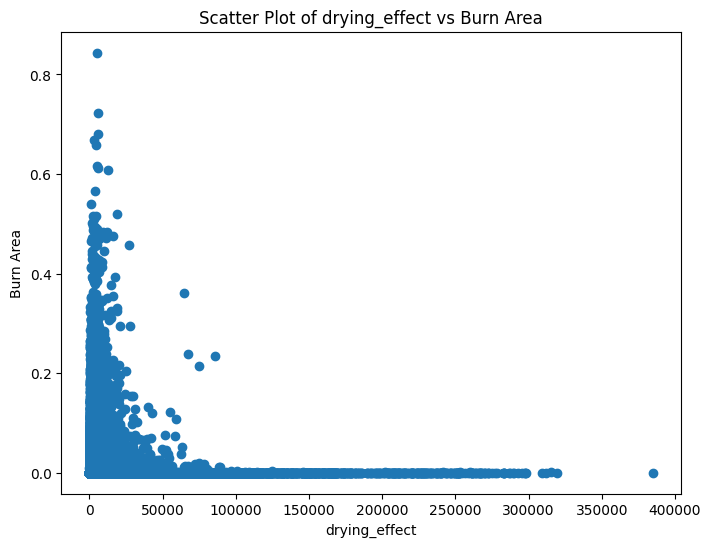

In [ ]:
# Plot scatter plots for new features vs 'burn_area'
for feature in ['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle',
                 'elevation_sun_interaction','temp_range','drying_effect']:
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data_copy[feature], train_data_copy['burn_area'])
    plt.xlabel(feature)
    plt.ylabel('Burn Area')
    plt.title(f'Scatter Plot of {feature} vs Burn Area')
    plt.show()


#### Outliers of new features

In [ ]:
# Calculate IQR for new features
Q1_new = train_data_copy[['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle', 'elevation_sun_interaction', 'drying_effect', 'temp_range']].quantile(0.25)
Q3_new = train_data_copy[['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle', 'elevation_sun_interaction', 'drying_effect', 'temp_range']].quantile(0.75)
IQR_new = Q3_new - Q1_new

# Define outlier boundaries for new features
lower_bound_new = Q1_new - 1.5 * IQR_new
upper_bound_new = Q3_new + 1.5 * IQR_new

# Identify outliers in new features
outliers_new = ((train_data_copy[['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle', 'elevation_sun_interaction', 'drying_effect','temp_range']] < lower_bound_new) |
                (train_data_copy[['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle', 'elevation_sun_interaction', 'drying_effect', 'temp_range']] > upper_bound_new)).sum()

# Outlier Summary for new features
outliers_new_df = pd.DataFrame({
    'Feature': outliers_new.index,
    'Number of Outliers': outliers_new.values,
    'Percentage of Outliers': (outliers_new.values / len(train_data_copy)) * 100
})

print(outliers_new_df)


                     Feature  Number of Outliers  Percentage of Outliers
0          combined_temp_vap                   0                0.000000
1        combined_vegetation               14170               17.041901
2       combined_water_cycle                   0                0.000000
3  elevation_sun_interaction                  53                0.063742
4              drying_effect                8842               10.634050
5                 temp_range                   0                0.000000


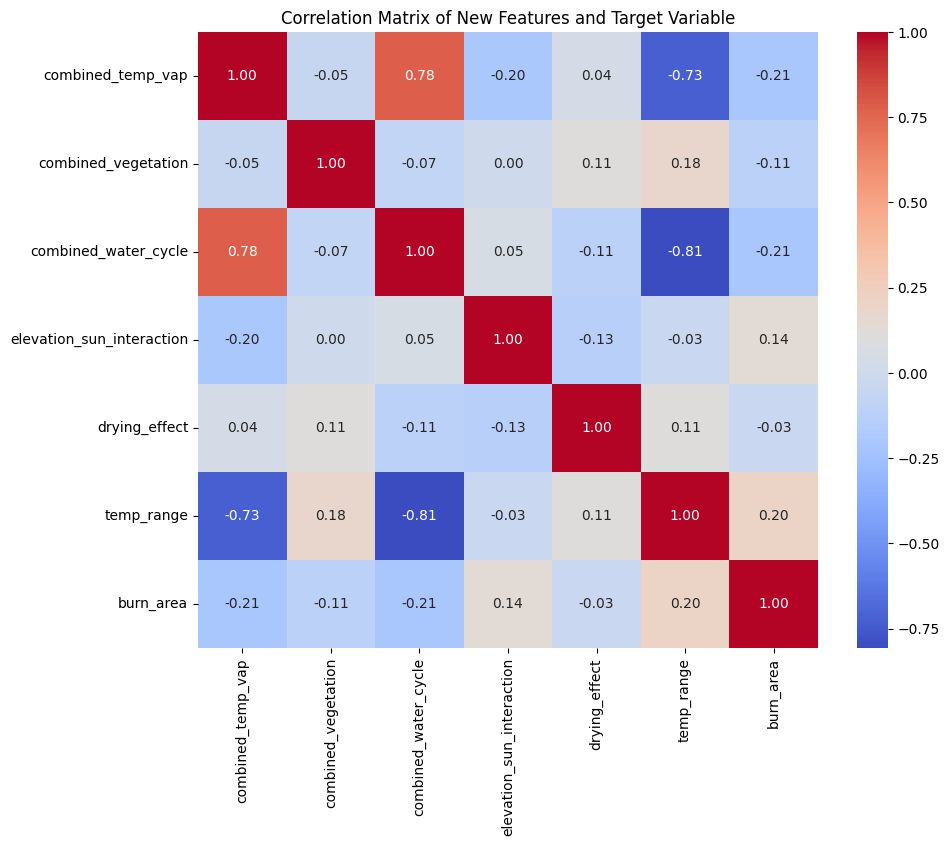

In [ ]:
# Select the new features and the target variable
new_features_data = train_data_copy[['combined_temp_vap', 'combined_vegetation', 'combined_water_cycle',
                                     'elevation_sun_interaction', 'drying_effect', 'temp_range', 'burn_area']]

# Calculate the correlation matrix
correlation_matrix_new = new_features_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of New Features and Target Variable')
plt.show()


### Heatmao with all features

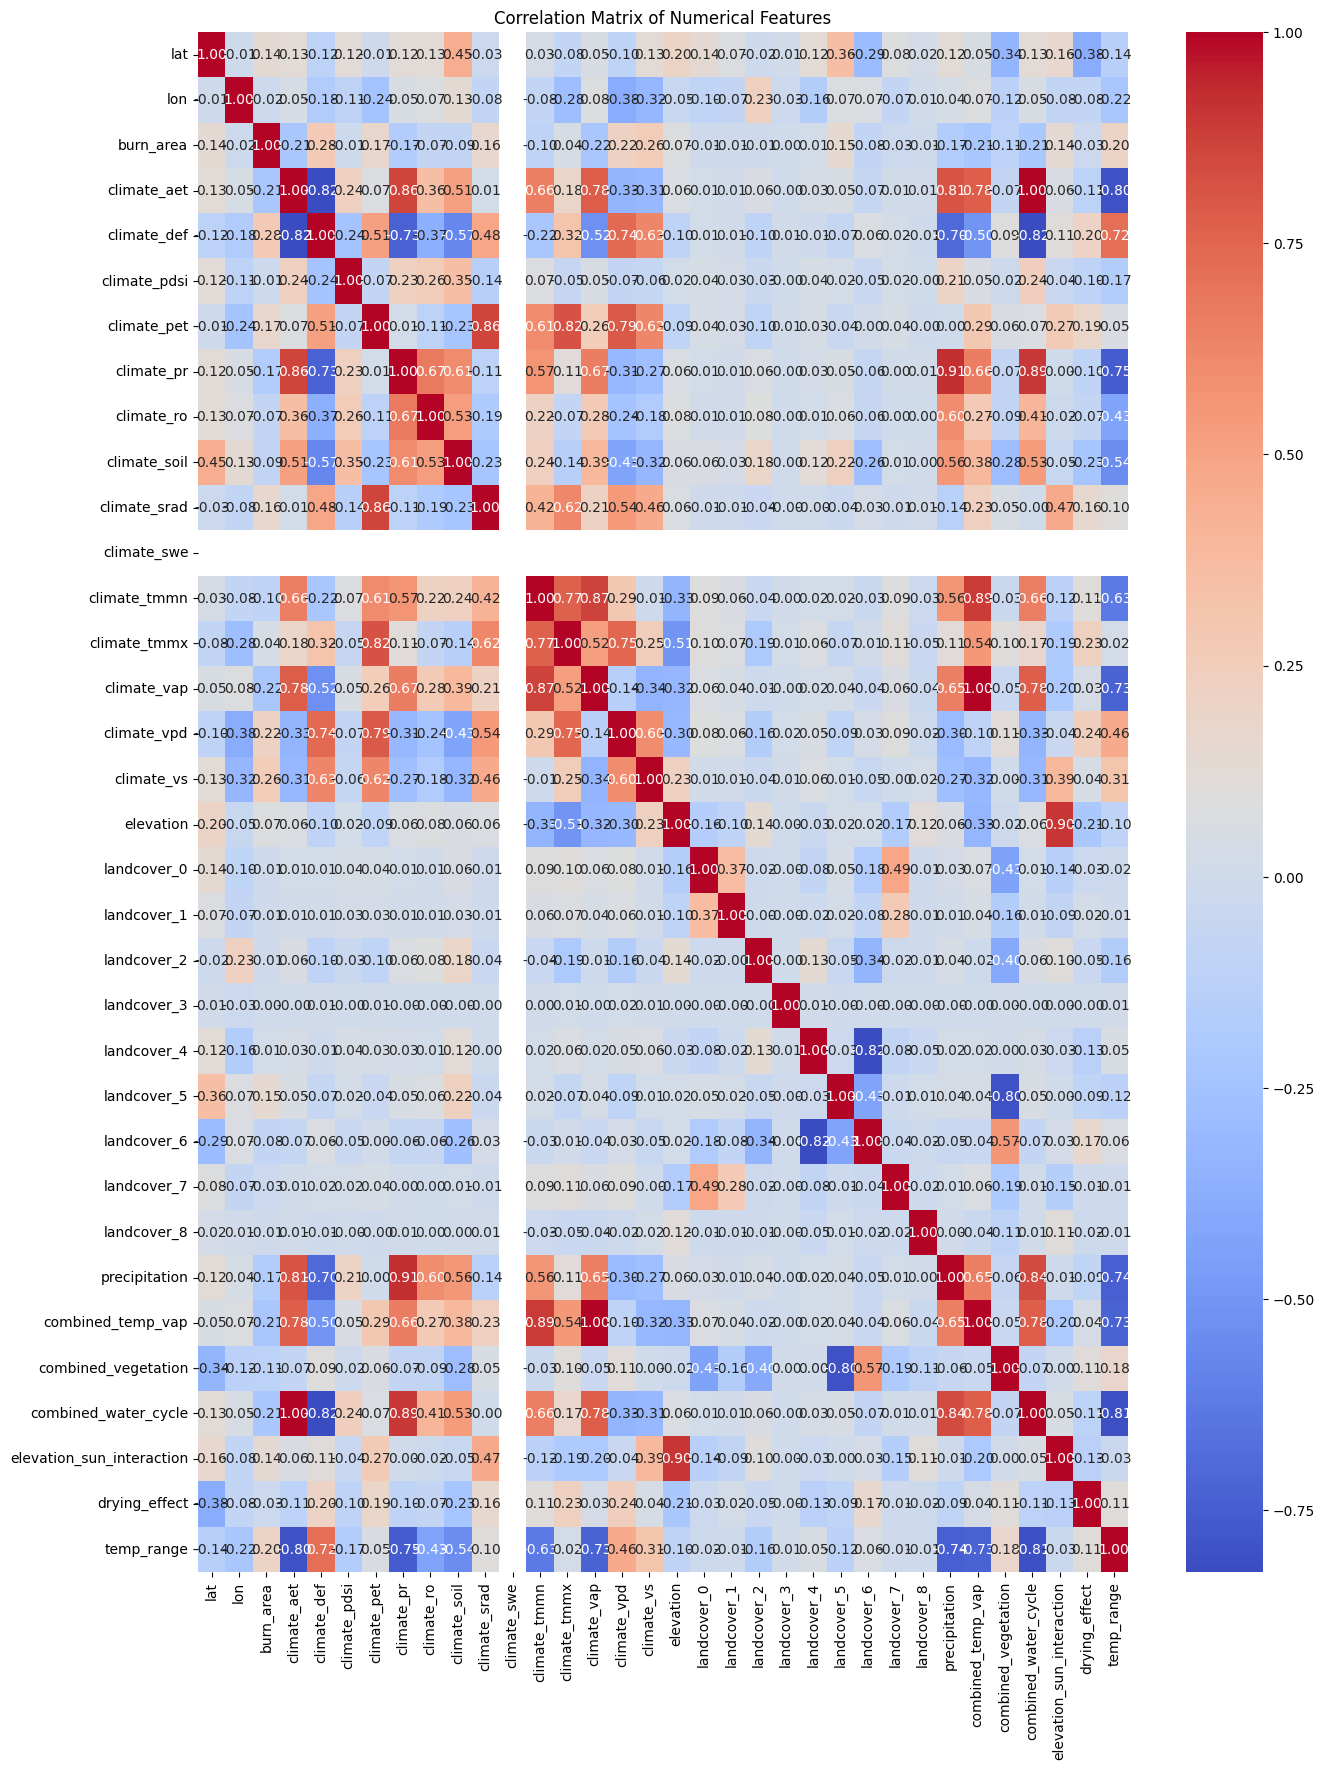

In [ ]:
# Select numerical columns
numerical_data = train_data_copy.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plot correlation matrix as a heatmap

plt.figure(figsize=(15, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Handling Outliers

Based on the number of outliers and the percentage of outliers in each feature, i choose the `Winsorization` method. Here's why:

**Winsorization:**
* Suitable for when you have a moderate number of outliers.
* Adjusts outliers to a certain percentile value.


### Winsorizing

In [98]:
# Function for Winsorization

def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.95):
    """
    Winsorizes a pandas Series (replaces extreme values with less extreme ones).

    Args:
        series: The pandas Series to winsorize.
        lower_quantile: The quantile to use for the lower limit (default: 0.05).
        upper_quantile: The quantile to use for the upper limit (default: 0.95).

    Returns:
        The winsorized pandas Series.
    """
    # Calculate the lower and upper limits based on the provided quantiles
    lower_limit = series.quantile(lower_quantile)
    upper_limit = series.quantile(upper_quantile)
    return series.clip(lower=lower_limit, upper=upper_limit)

Create a new version of the dataset for winsorization. (chose feature with moderate % : 1- 10) and % < 1


In [99]:
df_winsorized = train_data_copy.copy()

# List of features to winsorize
winsorize_outlier_features = ['climate_pr', 'climate_ro', 'climate_vpd', 'landcover_0', 'landcover_1', 'landcover_4', 'landcover_6', 'landcover_7', 'precipitation', 'climate_def', 'climate_pdsi', 'climate_pet', 'climate_srad', 'climate_tmmx', 'climate_vs', 'landcover_3' ]


# Apply winsorization to the selected features
for feature in winsorize_outlier_features:
    df_winsorized[feature] = winsorize_series(df_winsorized[feature])

# Display the rows of the modified DataFrame
df_winsorized.head()

ID        lat        lon  burn_area  climate_aet  climate_def  \
0  0_2001-01-01 -15.858835  29.237029        0.0         1195            0   
1  1_2001-01-01 -15.858835  29.487029        0.0         1196            0   
2  2_2001-01-01 -15.858835  29.737029        0.0         1190            0   
3  3_2001-01-01 -15.858835  29.987029        0.0         1144            0   
4  4_2001-01-01 -15.858835  30.237029        0.0         1187            0   

   climate_pdsi  climate_pet  climate_pr  climate_ro  ...  landcover_6  \
0           263         1195         203          10  ...     0.292224   
1           232         1196         201          10  ...     0.345121   
2           314         1190         192          10  ...     0.483579   
3           321         1144         186          16  ...     0.537098   
4           413         1187         186           9  ...     0.654866   

   landcover_7  landcover_8  precipitation  combined_temp_vap  \
0     0.001537          0.0       0.256932             1352.0   
1     0.000000          0.0       0.273093             1354.0   
2     0.000000          0.0       0.285109             1347.0   
3     0.000000          0.0       0.292240             1264.5   
4     0.000000          0.0       0.292240             1315.0   

   combined_vegetation  combined_water_cycle  elevation_sun_interaction  \
0             0.959336            467.085644               7.694765e+05   
1             0.999905            465.757698               8.010075e+05   
2             1.000000            460.761703               8.881556e+05   
3             0.836098            443.432806               1.204869e+06   
4             0.932258            457.771874               1.078495e+06   

   drying_effect  temp_range  
0     122.086879         106  
1     112.481980         107  
2     120.959451         109  
3     172.169651         107  
4     117.775963         110  

[5 rows x 35 columns]

In [100]:
# Calculate IQR for numerical columns after Winsorization
Q1_win = df_winsorized.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3_win = df_winsorized.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR_win = Q3_win - Q1_win

# Define outlier boundaries
lower_bound_win = Q1_win - 1.5 * IQR_win
upper_bound_win = Q3_win + 1.5 * IQR_win

# Identify outliers
outliers_win = ((df_winsorized.select_dtypes(include=['float64', 'int64']) < lower_bound_win) | (df_winsorized.select_dtypes(include=['float64', 'int64']) > upper_bound_win)).sum()

# Outlier Summary for each feature after Winsorization
outliers_win_df = pd.DataFrame({
    'Feature': outliers_win.index,
    'Number of Outliers': outliers_win.values,
    'Percentage of Outliers': (outliers_win.values / len(df_winsorized)) * 100
})

print(outliers_win_df)


                      Feature  Number of Outliers  Percentage of Outliers
0                         lat                   0                0.000000
1                         lon                   0                0.000000
2                   burn_area               19423               23.359552
3                 climate_aet                   0                0.000000
4                 climate_def                   0                0.000000
5                climate_pdsi                   0                0.000000
6                 climate_pet                   0                0.000000
7                  climate_pr                   0                0.000000
8                  climate_ro                5511                6.627941
9                climate_soil               10909               13.119979
10               climate_srad                   0                0.000000
11                climate_swe                   0                0.000000
12               climate_tmmn         

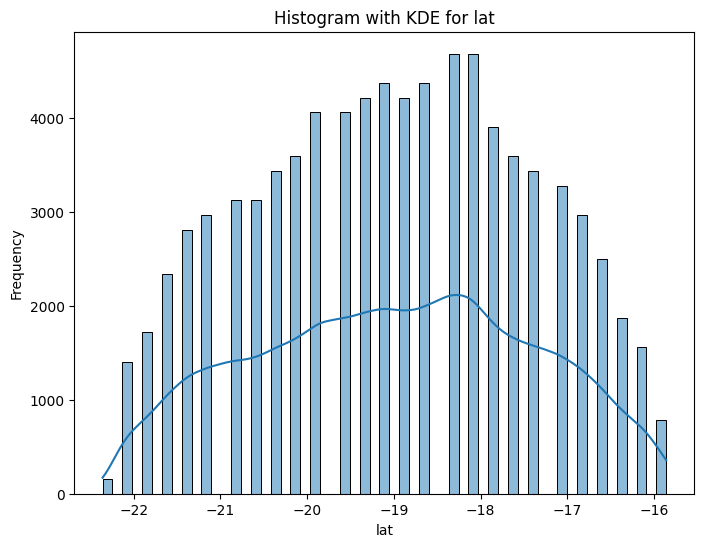

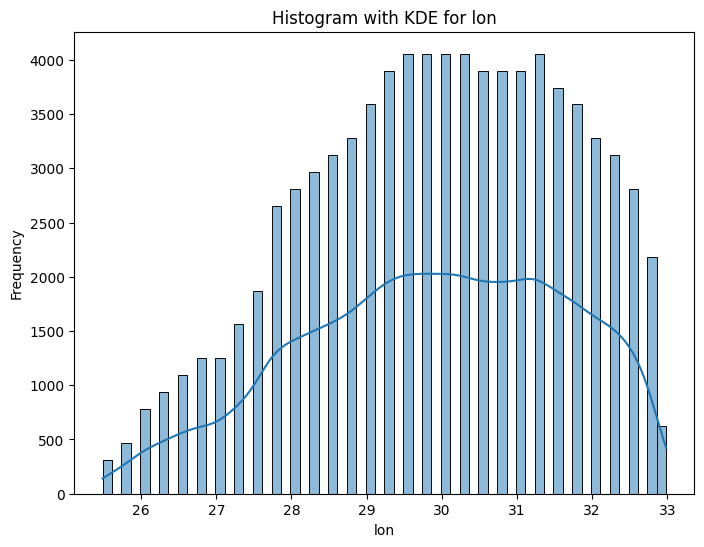

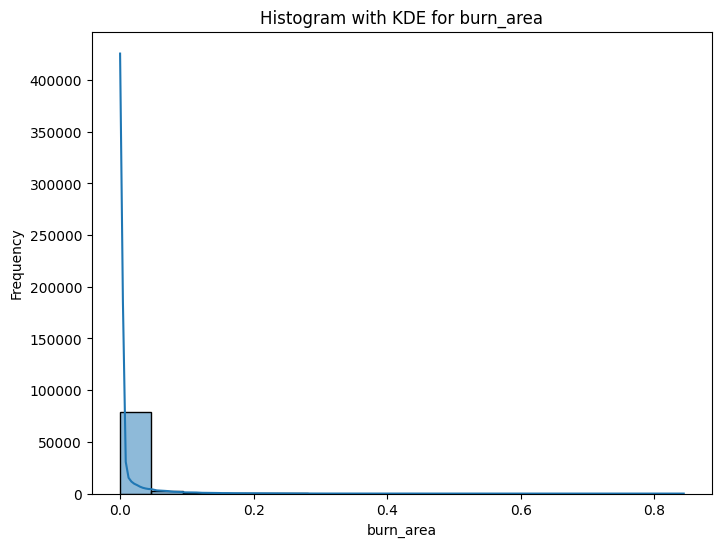

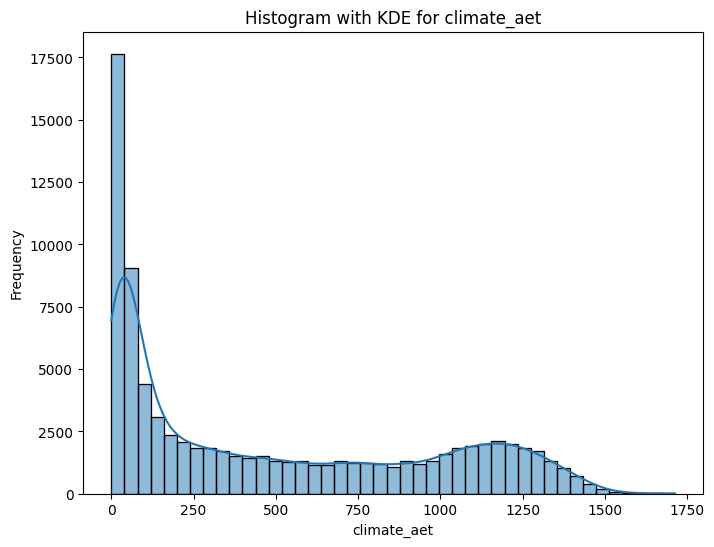

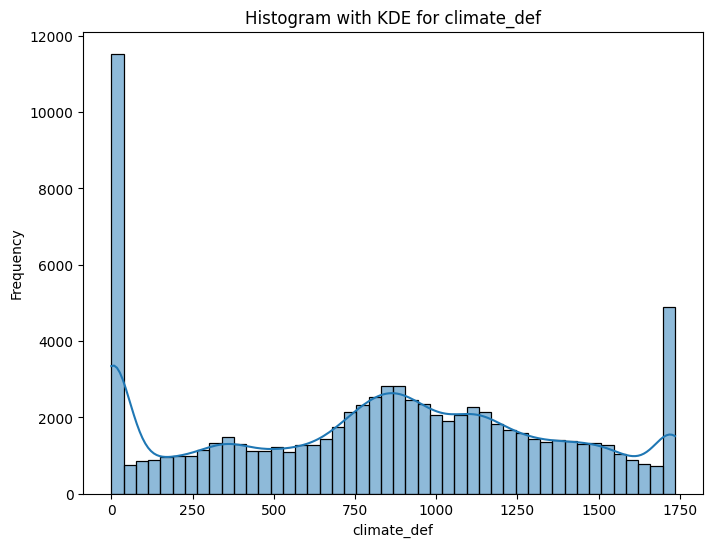

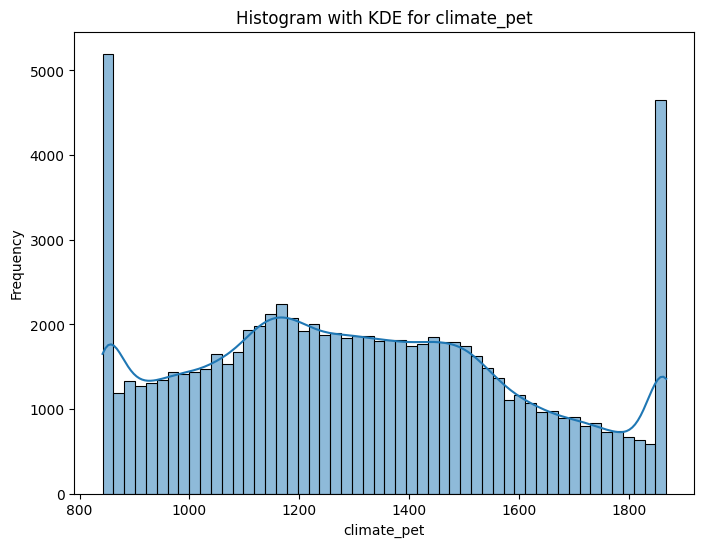

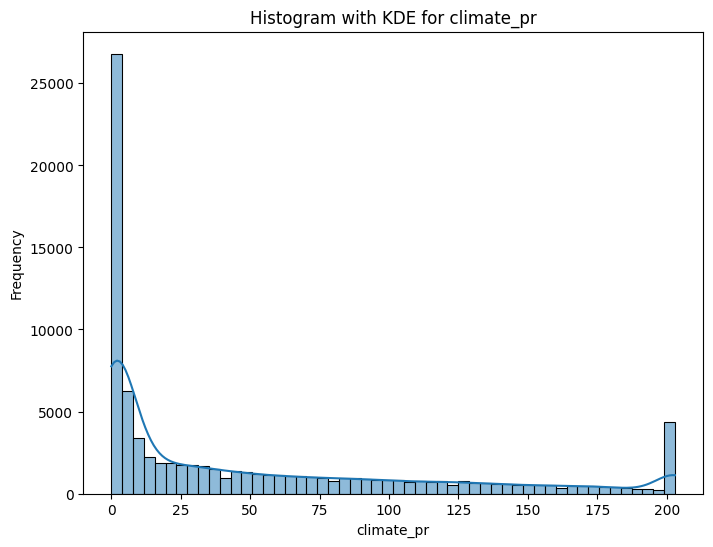

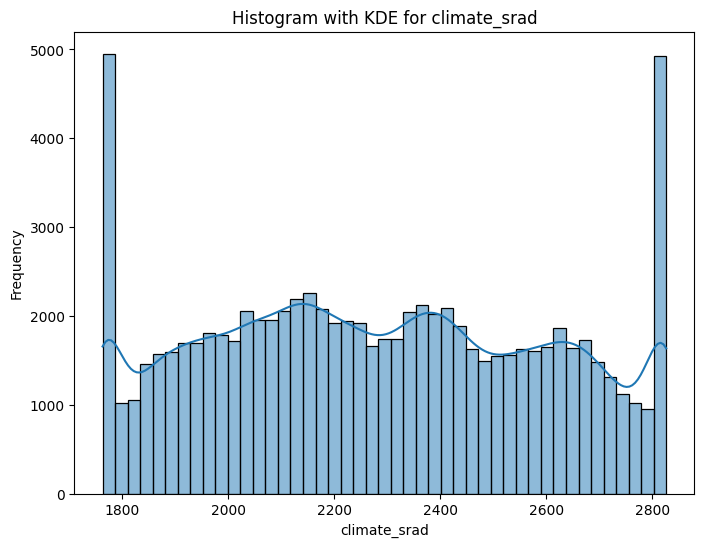

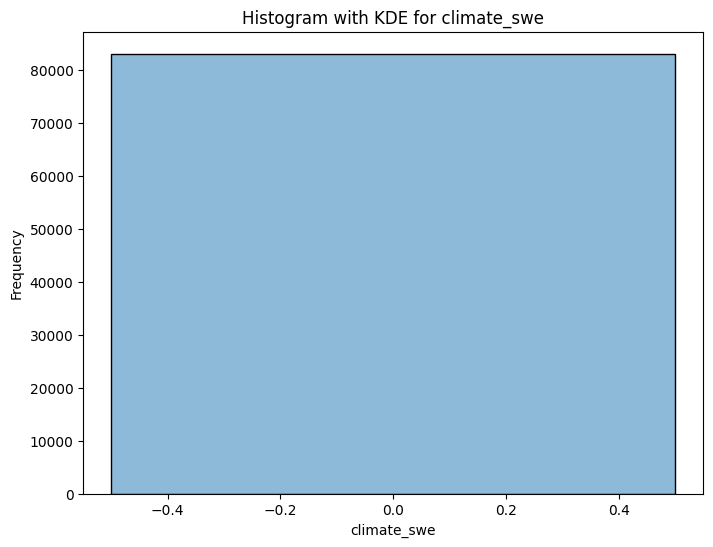

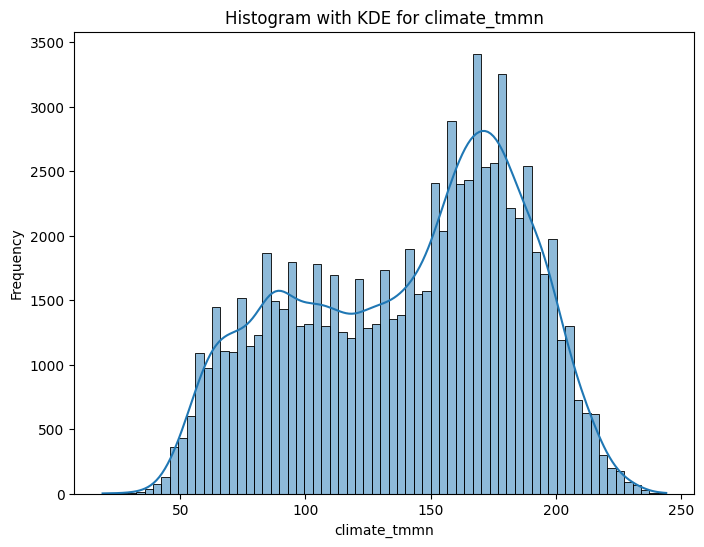

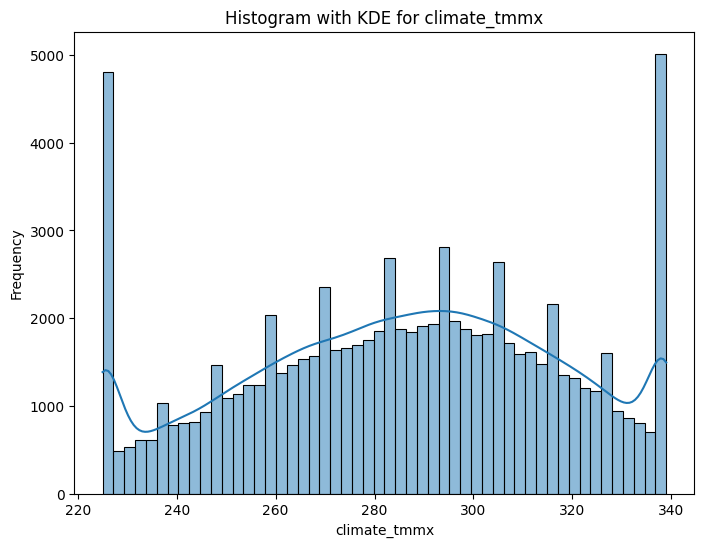

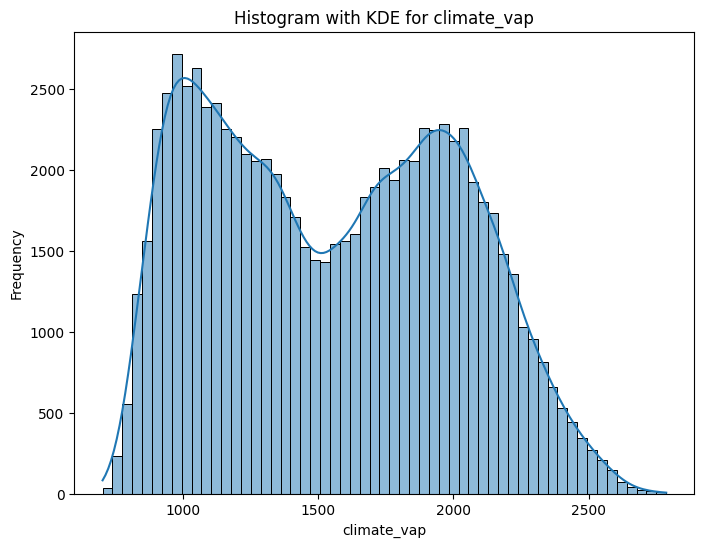

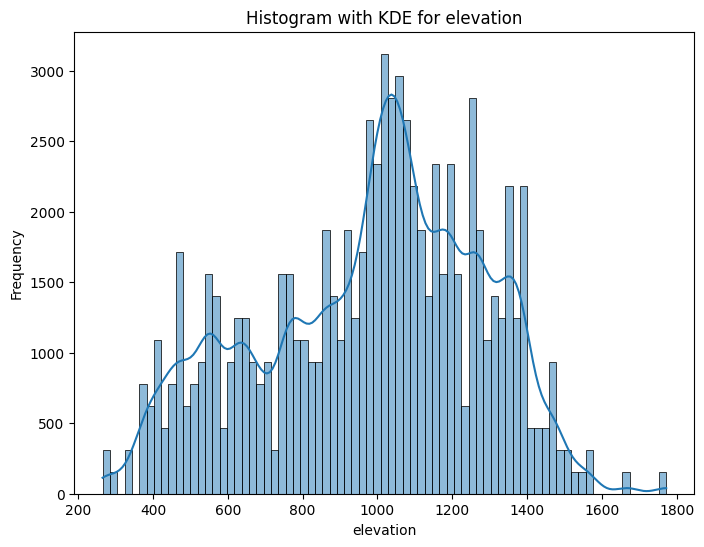

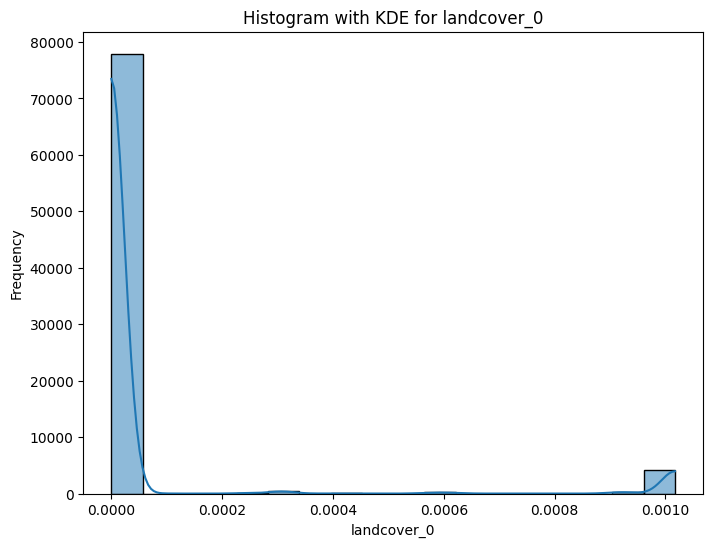

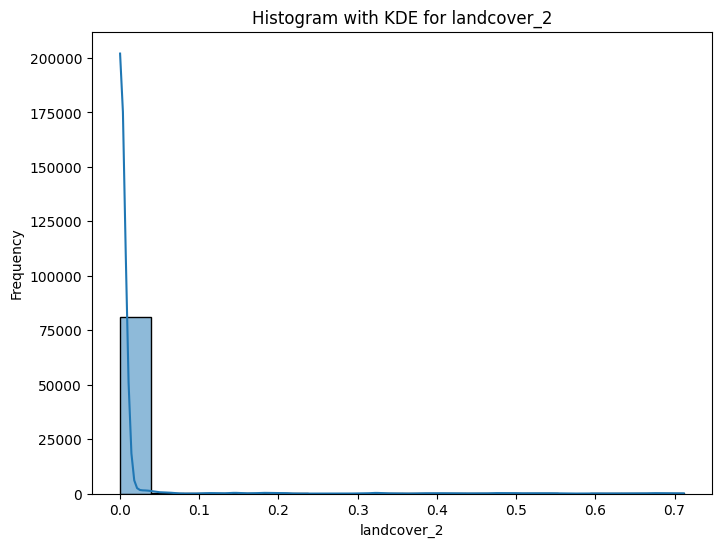

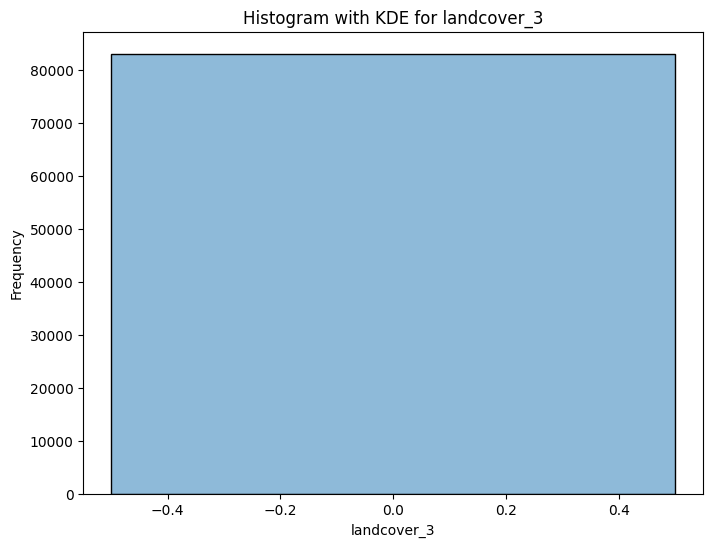

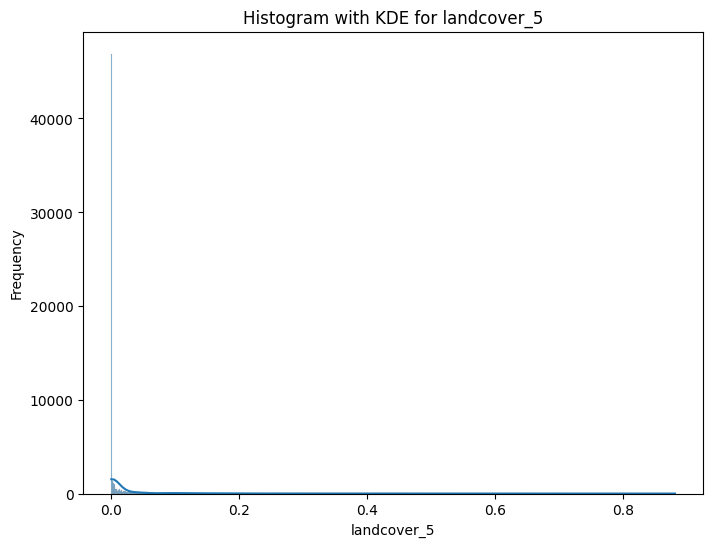

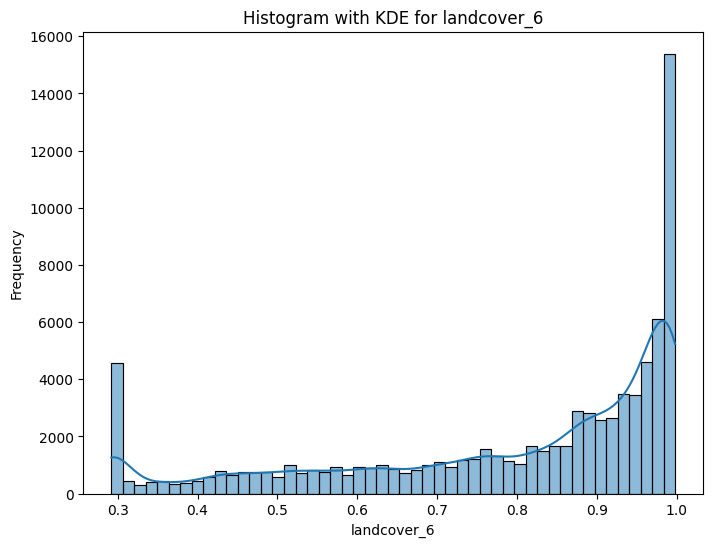

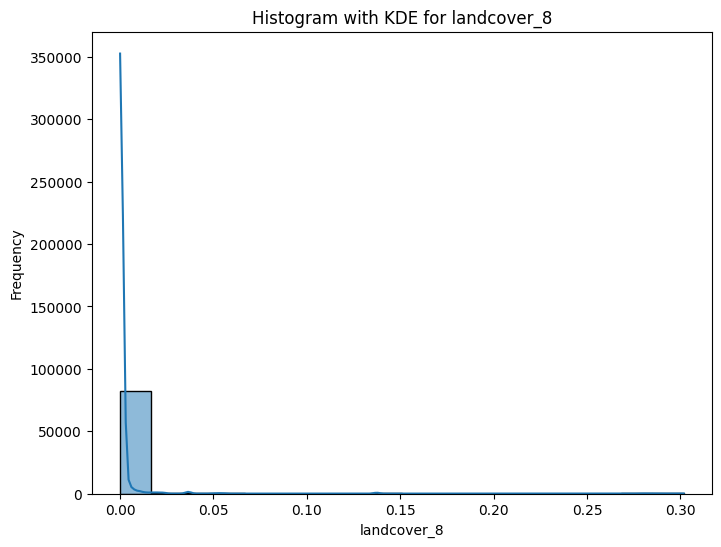

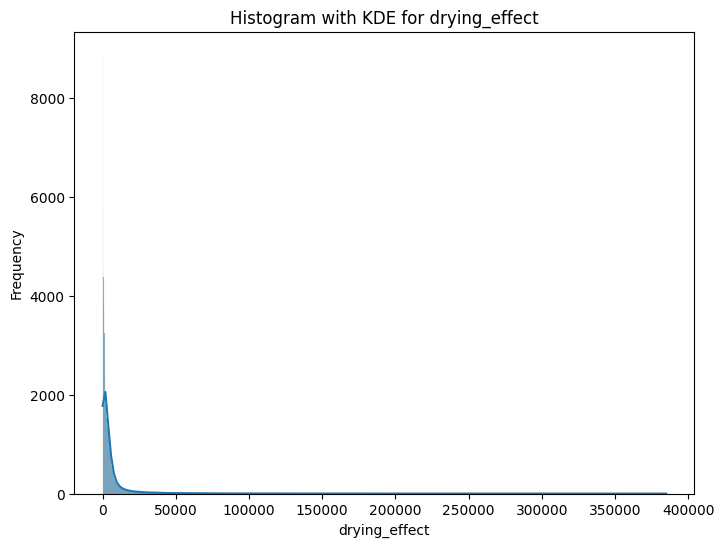

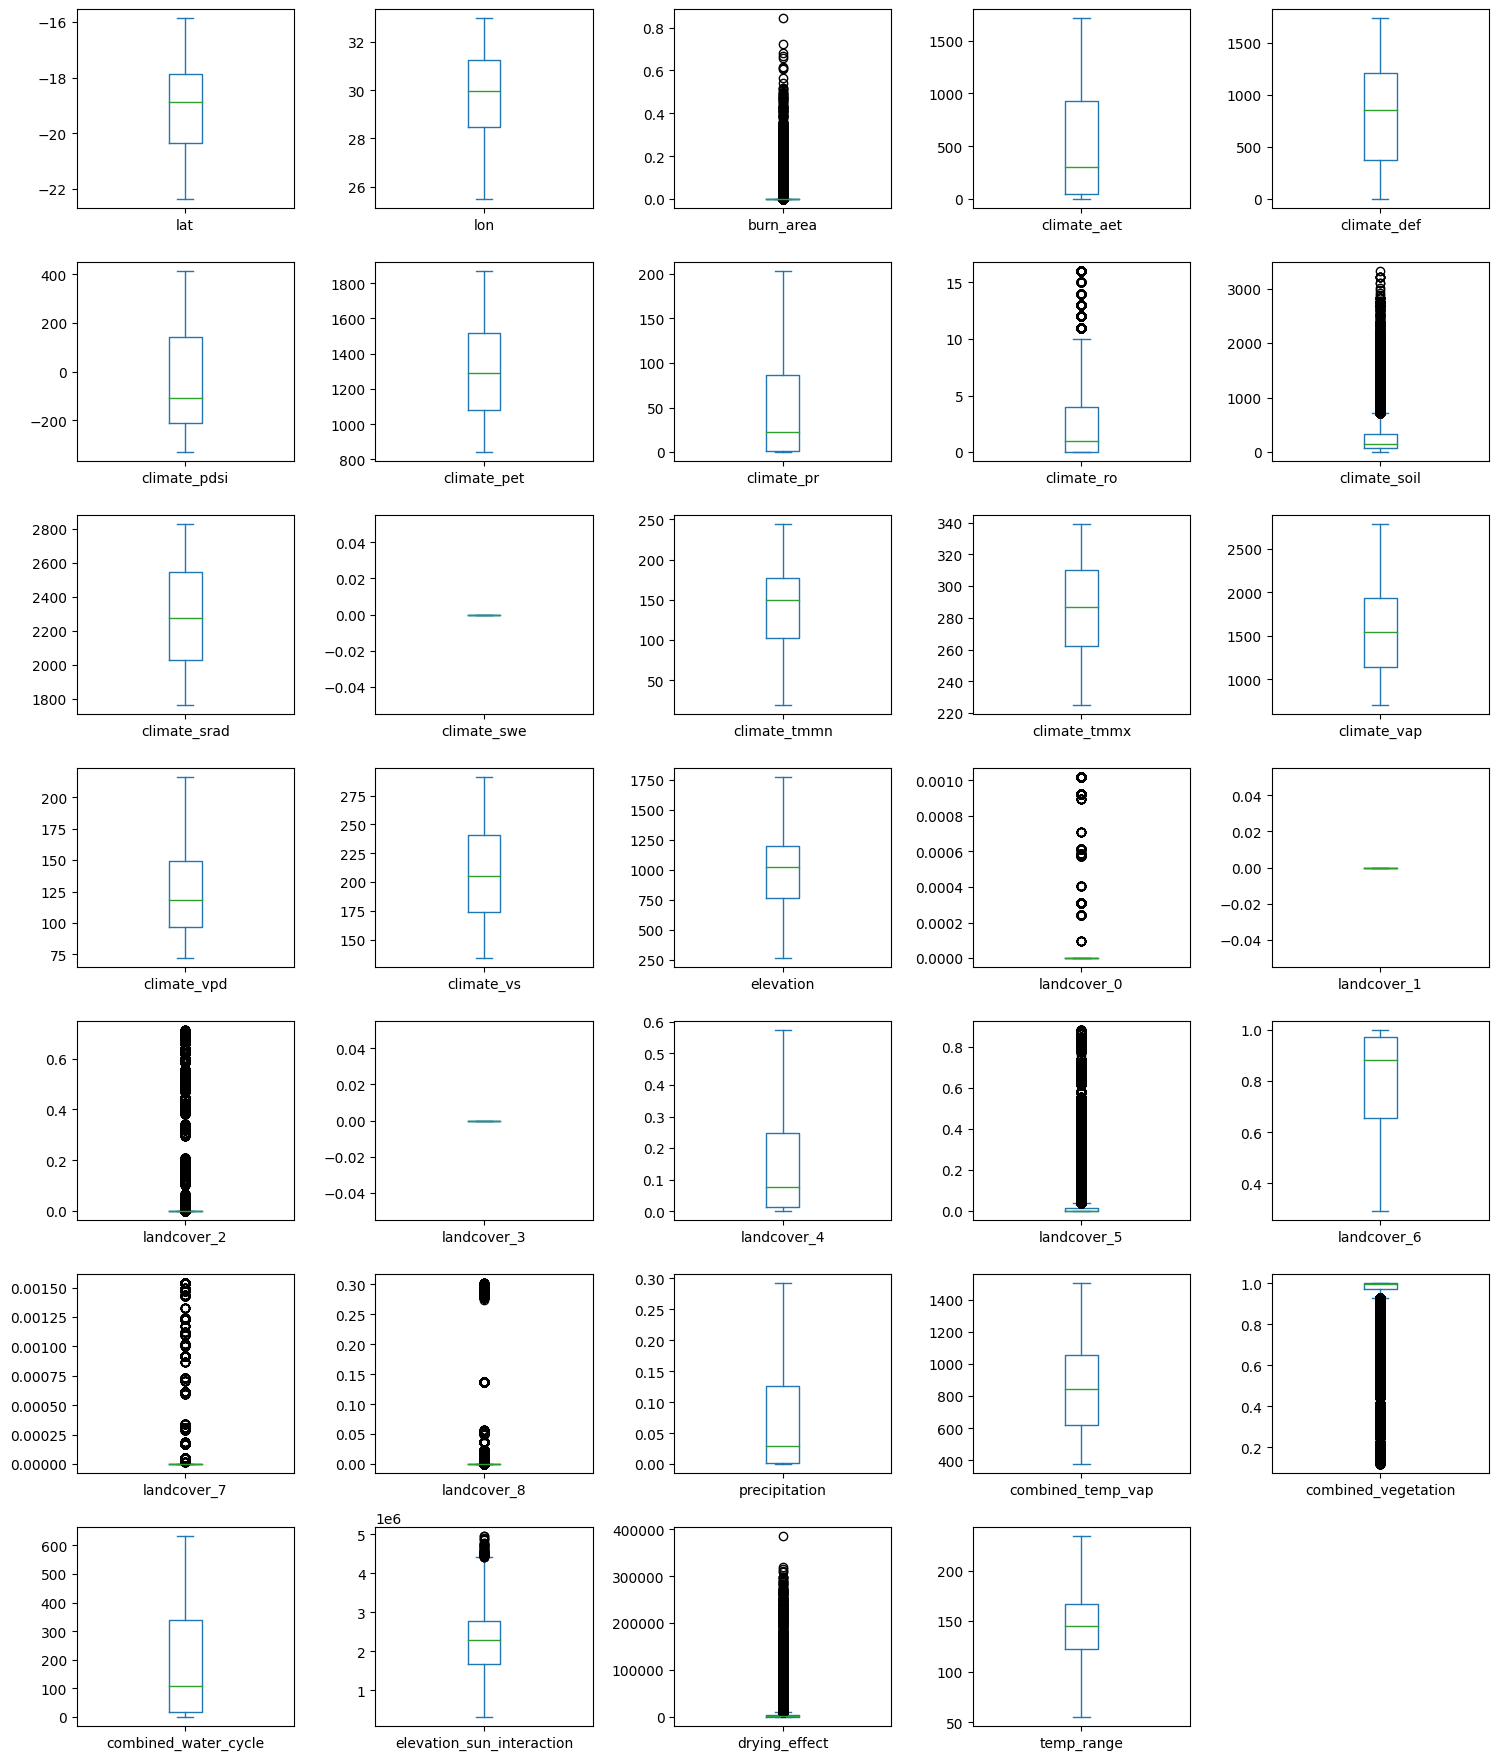

In [101]:
# Create histograms with KDE for all columns
for column in df_winsorized.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_winsorized[column], kde=True)
    plt.title(f'Histogram with KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for all columns after Winsorization
df_winsorized.plot(kind='box', subplots=True, layout=(8, 5), figsize=(15, 20))
plt.tight_layout()
plt.show()

In [ ]:
# Select numerical columns after Winsorization
numerical_data_win = df_winsorized.select_dtypes(include=['number'])

# Calculate correlation matrix after Winsorization
correlation_matrix_win = numerical_data_win.corr()

# Plot correlation matrix as a heatmap after Winsorization
plt.figure(figsize=(15, 20))
sns.heatmap(correlation_matrix_win, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (After Winsorization)')
plt.show()


# Step 5: Data Splitting


*How i dropped features*:


1.   Drop features with white line on the heatmap
2.   Compare correlated pairs and choose the one with a higher correlation to burn area (iterate)



Our target variable is heavily rightly skewed. Logarithmic transformation helps normalize the distribution, making it more symmetrical and compresses the range of values, reducing the impact of extreme outliers.

In [103]:
# Prepare the target variable
df_winsorized['log_burn_area'] = np.log1p(df_winsorized['burn_area'])


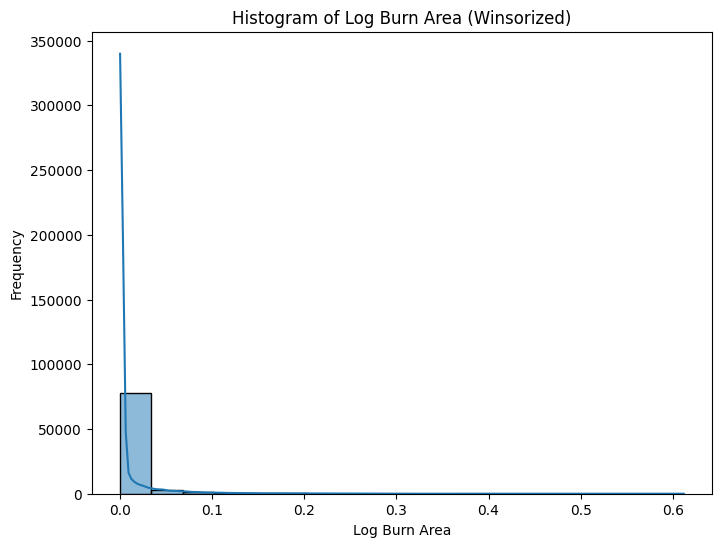

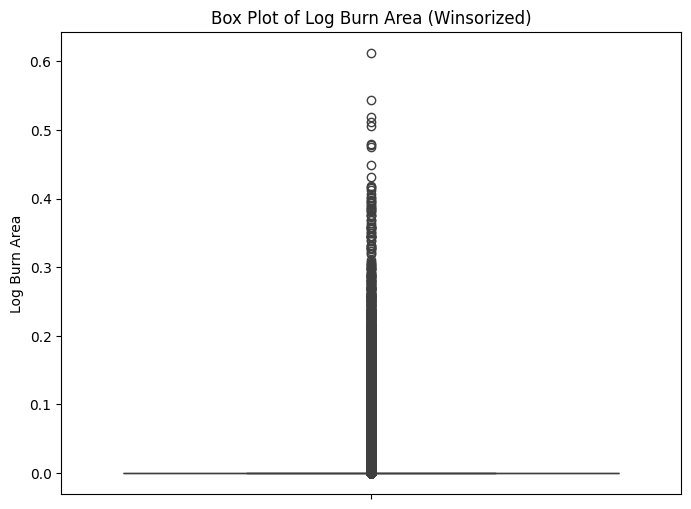

In [104]:
# Histogram of log_burn_area
plt.figure(figsize=(8, 6))
sns.histplot(df_winsorized['log_burn_area'], kde=True)
plt.title('Histogram of Log Burn Area (Winsorized)')
plt.xlabel('Log Burn Area')
plt.ylabel('Frequency')
plt.show()

# Box plot of log_burn_area
plt.figure(figsize=(8, 6))
sns.boxplot(df_winsorized['log_burn_area'])
plt.title('Box Plot of Log Burn Area (Winsorized)')
plt.ylabel('Log Burn Area')
plt.show()


In [107]:
from sklearn.model_selection import train_test_split

# Split the winsorized dataset into training and validation sets
X_win = df_winsorized.drop(['burn_area','climate_tmmn', 'climate_tmmx', 'climate_vap','climate_aet' ,'landcover_0', 'landcover_7', 'landcover_1','landcover_4','climate_srad' ,'climate_pr','precipitation' ,'climate_vpd', 'elevation' ,'climate_swe', 'landcover_3','climate_ro','log_burn_area'], axis=1)
y_win = df_winsorized['log_burn_area']
X_train_win, X_val_win, y_train_win, y_val_win = train_test_split(X_win, y_win, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train_win.shape)
print("X_val shape:", X_val_win.shape)
print("y_train shape:", y_train_win.shape)
print("y_val shape:", y_val_win.shape)





X_train shape: (66518, 18)
X_val shape: (16630, 18)
y_train shape: (66518,)
y_val shape: (16630,)


In [36]:
X_train_win.columns

Index(['ID', 'lat', 'lon', 'climate_def', 'climate_pdsi', 'climate_pet',
       'climate_soil', 'climate_vs', 'landcover_2', 'landcover_5',
       'landcover_6', 'landcover_8', 'year', 'month', 'day',
       'combined_temp_vap', 'combined_vegetation', 'combined_water_cycle',
       'elevation_sun_interaction', 'drying_effect', 'temp_range'],
      dtype='object')

In [108]:
X_train_win.head()

ID        lat        lon  climate_def  climate_pdsi  \
47723  286_2008-06-01 -19.108835  30.487029          803          -252   
75232   79_2012-10-01 -17.108835  31.987029         1634           133   
49537  501_2008-09-01 -21.608835  29.487029         1557          -207   
45442  137_2008-02-01 -17.858835  28.987029          351           370   
54640  274_2009-07-01 -19.108835  27.487029         1056            -9   

       climate_pet  climate_soil  climate_vs  landcover_2  landcover_5  \
47723          842           109         176          0.0     0.000000   
75232         1780           161         277          0.0     0.113744   
49537         1570             7         238          0.0     0.000000   
45442         1380           841         166          0.0     0.001844   
54640         1064            90         241          0.0     0.000000   

       landcover_6  landcover_8  combined_temp_vap  combined_vegetation  \
47723     0.972819          0.0              493.5             1.000000   
75232     0.807568          0.0              864.5             0.886256   
49537     0.978576          0.0              710.5             1.000000   
45442     0.973614          0.0             1181.0             0.998156   
54640     0.845865          0.0              423.0             1.000000   

       combined_water_cycle  elevation_sun_interaction  drying_effect  \
47723              6.666686               2.558578e+06    1552.513761   
75232             53.002256               2.392604e+06    2845.652174   
49537              4.667695               1.739619e+06   67808.571429   
45442            358.029232               2.521479e+06     324.494649   
54640              2.668507               2.015774e+06    2559.700000   

       temp_range  
47723         161  
75232         148  
49537         167  
45442         126  
54640         200

In [109]:
y_train_win.head()

47723    0.004294
75232    0.013521
49537    0.007040
45442    0.000000
54640    0.000000
Name: log_burn_area, dtype: float64

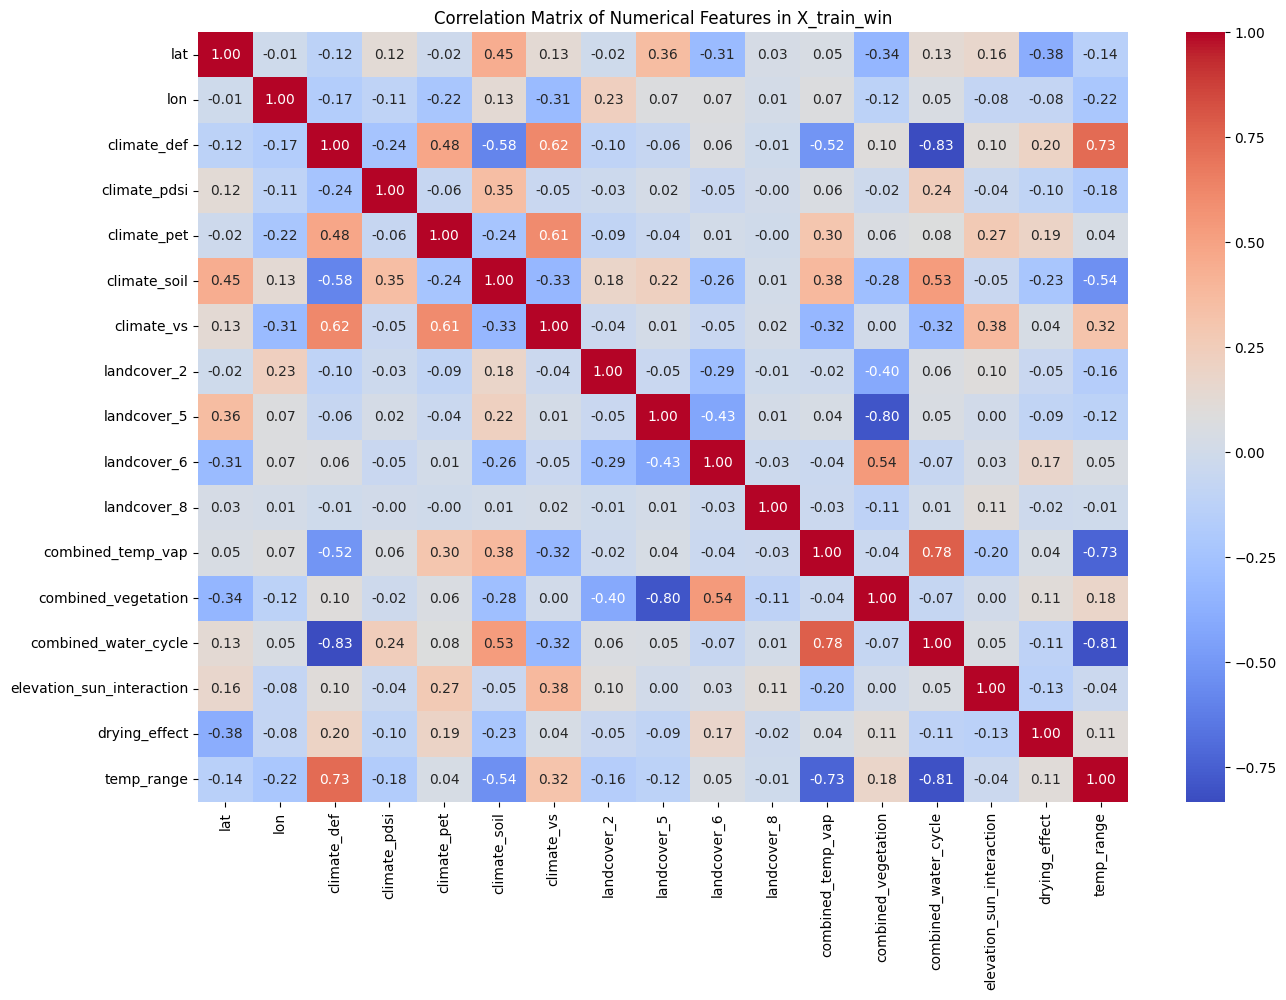

In [110]:
# Select numerical columns from X_train_win
numerical_data_train_win = X_train_win.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix_train_win = numerical_data_train_win.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_train_win, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in X_train_win')
plt.show()



In [111]:
# Set a threshold for correlation
threshold = 0.75

# Find highly correlated pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix_train_win.columns)):
  for j in range(i + 1, len(correlation_matrix_train_win.columns)):
    if abs(correlation_matrix_train_win.iloc[i, j]) > threshold:
      pair = (correlation_matrix_train_win.columns[i], correlation_matrix_train_win.columns[j], correlation_matrix_train_win.iloc[i, j])
      highly_correlated_pairs.append(pair)

# Print highly correlated pairs
print("Highly Correlated Pairs (Threshold = {}):".format(threshold))
for pair in highly_correlated_pairs:
  print("{} and {}: {:.2f}".format(pair[0], pair[1], pair[2]))


Highly Correlated Pairs (Threshold = 0.75):
climate_def and combined_water_cycle: -0.83
landcover_5 and combined_vegetation: -0.80
combined_temp_vap and combined_water_cycle: 0.78
combined_water_cycle and temp_range: -0.81


*Keeping these pairs because they have a high correlation to burn_area*

# Step 6: Data Scaling

 RobustScaler is less sensitive to outliers in the data compared to other scaling methods like StandardScaler.

In [76]:
# 1. Winsorized Dataset
scaler_win = RobustScaler()
# Drop non-numeric columns before scaling
X_train_win_numeric = X_train_win.select_dtypes(include=['number'])
X_val_win_numeric = X_val_win.select_dtypes(include=['number'])

# Scale the numeric columns
X_train_win_scaled = scaler_win.fit_transform(X_train_win_numeric)
X_val_win_scaled = scaler_win.transform(X_val_win_numeric)


# Step 7: Model Selection

Based on the nature of the dataset, the following model were chosen:

1. Random Forest
2. Gradient Boosting
3. XGBoost
4. LightGBM

# Step 8: Model Training

#### 1. Random Forest

In [112]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_win_scaled, y_train_win)


RandomForestRegressor(random_state=42)

In [113]:
# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val_win_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_val_win, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val_win, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print("Random Forest - R-squared:", r2_rf)


Random Forest - Mean Squared Error: 0.000358599256179063
Random Forest - Root Mean Squared Error: 0.01893671714366202
Random Forest - R-squared: 0.4512985159615768


In [114]:
# Create a dictionary to store the results
results = {
    'Model': ['Random Forest'],
    'MSE': [mse_rf],
    'RMSE': [rmse_rf],
    'R-squared': [r2_rf]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


           Model       MSE      RMSE  R-squared
0  Random Forest  0.000359  0.018937   0.451299


#### 2. Gradient Boosting

In [115]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_win_scaled, y_train_win)


GradientBoostingRegressor(random_state=42)

In [116]:
# Make predictions on the validation set
y_pred_gb = gb_model.predict(X_val_win_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_val_win, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_val_win, y_pred_gb)

print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - Root Mean Squared Error:", rmse_gb)
print("Gradient Boosting - R-squared:", r2_gb)

Gradient Boosting - Mean Squared Error: 0.00043106741972219606
Gradient Boosting - Root Mean Squared Error: 0.020762163175406266
Gradient Boosting - R-squared: 0.34041320820789644


In [118]:
# Add the results to the result dataframe
gb_model_row = {'Model': 'Gradient Boosting', 'MSE': mse_gb, 'RMSE': rmse_gb, 'R-squared': r2_gb}
results_df = pd.concat([results_df, pd.DataFrame([gb_model_row])], ignore_index=True)

# Display the updated DataFrame
print(results_df)

               Model       MSE      RMSE  R-squared
0      Random Forest  0.000359  0.018937   0.451299
1  Gradient Boosting  0.000431  0.020762   0.340413


#### 3. XGBoost

In [127]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train_win_scaled, y_train_win)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [128]:
# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val_win_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_val_win, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val_win, y_pred_xgb)

print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - Root Mean Squared Error:", rmse_xgb)
print("XGBoost - R-squared:", r2_xgb)

XGBoost - Mean Squared Error: 0.00037901327445181635
XGBoost - Root Mean Squared Error: 0.019468263262341003
XGBoost - R-squared: 0.42006252779808195


In [121]:
# Add the results to the result dataframe
xgb_model_row = {'Model': 'XGBoost', 'MSE': mse_xgb, 'RMSE': rmse_xgb, 'R-squared': r2_xgb}
results_df = pd.concat([results_df, pd.DataFrame([xgb_model_row])], ignore_index=True)

# Display the updated DataFrame
print(results_df)

               Model       MSE      RMSE  R-squared
0      Random Forest  0.000359  0.018937   0.451299
1  Gradient Boosting  0.000431  0.020762   0.340413
2            XGBoost  0.000379  0.019468   0.420063


#### 4. LightGBM

In [129]:
# Initialize the LightGBM Regressor
lgbm_model = LGBMRegressor(random_state=42)

# Train the model
lgbm_model.fit(X_train_win_scaled, y_train_win)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 66518, number of used features: 17
[LightGBM] [Info] Start training from score 0.007353


LGBMRegressor(random_state=42)

In [126]:
# Make predictions on the validation set
y_pred_lgbm = lgbm_model.predict(X_val_win_scaled)

# Evaluate the model
mse_lgbm = mean_squared_error(y_val_win, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_val_win, y_pred_lgbm)

print("LightGBM - Mean Squared Error:", mse_lgbm)
print("LightGBM - Root Mean Squared Error:", rmse_lgbm)
print("LightGBM - R-squared:", r2_lgbm)

LightGBM - Mean Squared Error: 0.00036204739201424355
LightGBM - Root Mean Squared Error: 0.019027542984164918
LightGBM - R-squared: 0.44602243906702543


In [124]:
# Add the results to the result dataframe
lgbm_model_row = {'Model': 'LightGBM', 'MSE': mse_lgbm, 'RMSE': rmse_lgbm, 'R-squared': r2_lgbm}
results_df = pd.concat([results_df, pd.DataFrame([lgbm_model_row])], ignore_index=True)

# Display the updated DataFrame
print(results_df)

               Model       MSE      RMSE  R-squared
0      Random Forest  0.000359  0.018937   0.451299
1  Gradient Boosting  0.000431  0.020762   0.340413
2            XGBoost  0.000379  0.019468   0.420063
3           LightGBM  0.000362  0.019028   0.446022


# Step 9: Model Evaluation

## Observations from the Model Evaluation Results:

###Random Forest

Achieved the best R² score of 0.451299, suggesting it explained around 45% of the variance in the target variable. It also had the lowest MSE and RMSE, indicating good predictive accuracy.

### LightGBM

Achieved an R² of 0.446022, MSE of 0.000362, and RMSE of 0.019028. It performed nearly as well as Random Forest.

### XGBoost

Achieved an R² of 0.420063 and an MSE of 0.000379. Its RMSE was slightly higher than LightGBM's, indicating a marginally less accurate model.

### Gradient Boosting

Had the lowest R² of 0.340413 and the highest RMSE of 0.020762. While still a strong model, it was outperformed by the others in this context.

## Visualizing

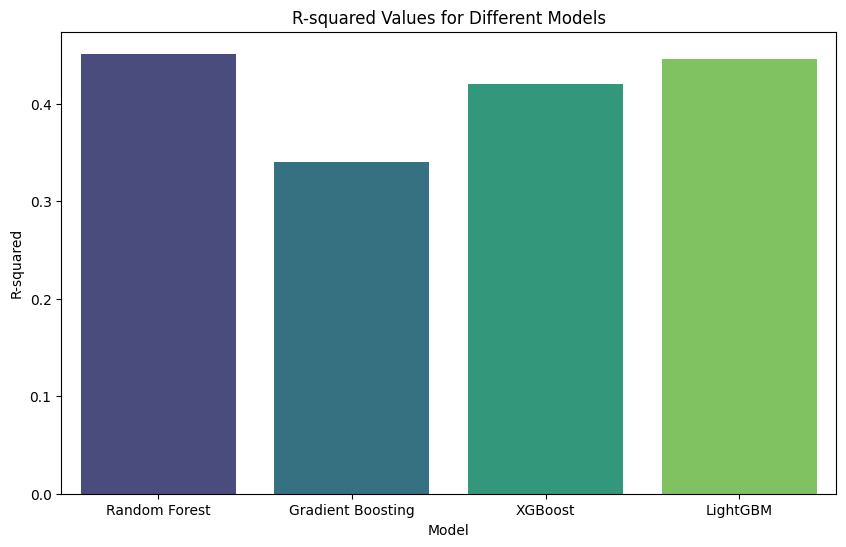

In [149]:
# Create a bar plot to visualize the R-squared values
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=results_df, hue='Model', palette = 'viridis')
plt.title('R-squared Values for Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()


# Step 10: Model Improvement

## Hypertuning Parameter

*TO DO*

# TEST DATASET

In [57]:
test_data = pd.read_csv('/content/drive/MyDrive/fire-extent-prediction-challenge-120240716-19716-ztmgh3/Test.csv')

In [140]:
test_data

ID        lat        lon  climate_aet  climate_def  \
0        0_2014-01-01 -15.858835  29.237029         1146           74   
1        1_2014-01-01 -15.858835  29.487029         1118           98   
2        2_2014-01-01 -15.858835  29.737029         1067          137   
3        3_2014-01-01 -15.858835  29.987029          969          187   
4        4_2014-01-01 -15.858835  30.237029          927          270   
...               ...        ...        ...          ...          ...   
25579  528_2017-12-01 -22.108835  30.737029          802         1030   
25580  529_2017-12-01 -22.108835  30.987029          819          971   
25581  530_2017-12-01 -22.108835  31.237029          756         1076   
25582  531_2017-12-01 -22.108835  31.487029          749         1071   
25583  532_2017-12-01 -22.358835  31.237029          609         1283   

       climate_pdsi  climate_pet  climate_pr  climate_ro  climate_soil  ...  \
0              -451         1220         120           6           212  ...   
1              -405         1216         117           6           330  ...   
2              -468         1204         111           6           194  ...   
3              -533         1156         101           5            78  ...   
4              -505         1197          96           5           139  ...   
...             ...          ...         ...         ...           ...  ...   
25579           168         1832          84           4            81  ...   
25580           169         1790          85           4            81  ...   
25581           156         1833          79           4            88  ...   
25582           178         1820          78           4           102  ...   
25583          -118         1892          64           3            57  ...   

       landcover_0  landcover_1  landcover_2  landcover_3  landcover_4  \
0              0.0     0.000615     0.015418          0.0     0.416704   
1              0.0     0.000000     0.000000          0.0     0.406436   
2              0.0     0.000000     0.000000          0.0     0.254791   
3              0.0     0.000000     0.000000          0.0     0.219340   
4              0.0     0.000000     0.000000          0.0     0.220239   
...            ...          ...          ...          ...          ...   
25579          0.0     0.000000     0.000000          0.0     0.029888   
25580          0.0     0.000000     0.000000          0.0     0.396455   
25581          0.0     0.000000     0.000000          0.0     0.455142   
25582          0.0     0.000000     0.000000          0.0     0.680874   
25583          0.0     0.000000     0.000000          0.0     0.179110   

       landcover_5  landcover_6  landcover_7  landcover_8  precipitation  
0         0.023724     0.530016     0.013524          0.0       0.404243  
1         0.000446     0.593118     0.000000          0.0       0.421489  
2         0.000000     0.745209     0.000000          0.0       0.419122  
3         0.182153     0.598507     0.000000          0.0       0.404596  
4         0.097748     0.682013     0.000000          0.0       0.371100  
...            ...          ...          ...          ...            ...  
25579     0.000000     0.970112     0.000000          0.0       0.049016  
25580     0.000000     0.603545     0.000000          0.0       0.041220  
25581     0.000000     0.544858     0.000000          0.0       0.031323  
25582     0.000000     0.319126     0.000000          0.0       0.032025  
25583     0.012149     0.808741     0.000000          0.0       0.022599  

[25584 rows x 28 columns]

In [141]:
# Check for null values

test_data.isnull().sum()

ID               0
lat              0
lon              0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_swe      0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64

In [143]:
# Prepare Test Data (Winsorized)
test_data_win = test_data.copy()

# Combine features
test_data_win['combined_temp_vap'] = (test_data_win['climate_tmmn'] + test_data_win['climate_vap']) / 2
test_data_win['combined_vegetation'] = (test_data_win['landcover_4'] + test_data_win['landcover_6']) / 2
test_data_win['combined_water_cycle'] = (test_data_win['climate_aet'] + test_data_win['climate_pr'] + test_data_win['precipitation']) / 3
test_data_win['elevation_sun_interaction'] = test_data_win['elevation'] * test_data_win['climate_srad']
test_data_win['drying_effect'] = (test_data_win['climate_vpd'] * test_data_win['climate_srad']) / test_data_win['climate_soil']
test_data_win['temp_range'] = train_data_copy['climate_tmmx'] - train_data_copy['climate_tmmn']

test_data_win = test_data_win.drop(['climate_tmmn', 'climate_tmmx', 'climate_vap','climate_aet' ,'landcover_0', 'landcover_7', 'landcover_1','landcover_4','climate_srad' ,'climate_pr','precipitation' ,'climate_vpd', 'elevation' ,'climate_swe', 'landcover_3','climate_ro' ], axis=1)
test_data_win.head()


ID        lat        lon  climate_def  climate_pdsi  climate_pet  \
0  0_2014-01-01 -15.858835  29.237029           74          -451         1220   
1  1_2014-01-01 -15.858835  29.487029           98          -405         1216   
2  2_2014-01-01 -15.858835  29.737029          137          -468         1204   
3  3_2014-01-01 -15.858835  29.987029          187          -533         1156   
4  4_2014-01-01 -15.858835  30.237029          270          -505         1197   

   climate_soil  climate_vs  landcover_2  landcover_5  landcover_6  \
0           212         148     0.015418     0.023724     0.530016   
1           330         143     0.000000     0.000446     0.593118   
2           194         143     0.000000     0.000000     0.745209   
3            78         122     0.000000     0.182153     0.598507   
4           139         143     0.000000     0.097748     0.682013   

   landcover_8  combined_temp_vap  combined_vegetation  combined_water_cycle  \
0          0.0             1349.0             0.473360            422.134748   
1          0.0             1348.5             0.499777            411.807163   
2          0.0             1339.5             0.500000            392.806374   
3          0.0             1259.5             0.408923            356.801532   
4          0.0             1311.0             0.451126            341.123700   

   elevation_sun_interaction  drying_effect  temp_range  
0               8.161992e+05     921.820755         106  
1               8.464852e+05     597.878788         107  
2               9.344485e+05     979.000000         109  
3               1.263043e+06    2204.512821         107  
4               1.129158e+06    1381.014388         110

In [144]:
test_data_win.shape

(25584, 18)

In [145]:
test_data_win.columns

Index(['ID', 'lat', 'lon', 'climate_def', 'climate_pdsi', 'climate_pet',
       'climate_soil', 'climate_vs', 'landcover_2', 'landcover_5',
       'landcover_6', 'landcover_8', 'combined_temp_vap',
       'combined_vegetation', 'combined_water_cycle',
       'elevation_sun_interaction', 'drying_effect', 'temp_range'],
      dtype='object')

In [146]:
# Scale the test data
X_test_win_numeric = test_data_win.select_dtypes(include=['number'])
X_test_win_scaled = scaler_win.transform(X_test_win_numeric)

In [147]:
# Choose the second best performing model LightGBM
best_model2 = LGBMRegressor()
best_model2.fit(X_train_win_scaled, y_train_win)

# Make predictions on the test data
y_pred_test_win = best_model2.predict(X_test_win_scaled)

# Since the target variable was log-transformed, inverse the transformation to get predictions in original scale
y_pred_test_original_scale = np.expm1(y_pred_test_win)


# Create a submission DataFrame
submission_df_win = pd.DataFrame({
    'ID': test_data['ID'],
    'burn_area': y_pred_test_original_scale
})

print(submission_df_win)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 66518, number of used features: 17
[LightGBM] [Info] Start training from score 0.007353
                   ID  burn_area
0        0_2014-01-01   0.000784
1        1_2014-01-01   0.000229
2        2_2014-01-01   0.000878
3        3_2014-01-01   0.000888
4        4_2014-01-01   0.000731
...               ...        ...
25579  528_2017-12-01   0.000616
25580  529_2017-12-01   0.000969
25581  530_2017-12-01   0.002483
25582  531_2017-12-01   0.003128
25583  532_2017-12-01   0.001826

[25584 rows x 2 columns]


In [148]:
submission_df_win.to_csv('lgbm_win_submission.csv', index=False)